# ABSTRACT


This data science project investigates the relationship between NFL player statistics and which ones are the most productive to win fantasy football games.  It's a feature importance machine learning predicting best features where player and team stats are the features in the model.

Fantasy sports in the U.S. continues to grow. The fantasy sports industry has grown from an estimated 32 million players in the US and Canada in 2010 to over 64 million in 2019. The industry grew in the U.S. from 42 million in 2015 to 45.9 million in 2019 (according to TheFSGA.org).  In addition, according to the legal betting congress bill tracker (https://www.legalsportsreport.com/sportsbetting-bill-tracker/) there could be 41 states with some form of legalized sports gambling in the U.S in 2020.  In addition, more and more people are betting on daily fantasy football with the popularity of sites like FanDuel, DraftKings and draft.com.

There’s essentially 3 outcomes/goals for this project:

* Win season long fantasy football against your friends and colleagues. Think about the “bragging rights.”  In addition, some of these leagues have financial gains too
* Don't waste money for statistical services that don't provide good research
* Saving you from the worst case scenario of coming in last place with season long fantasy football.   

These goals can be achieved by providing better knowledge of which statistical features are more likely to win in fantasy football

These predictors will not only increase chances of winning more fantasy football but reduce coming in last place in season long leagues.  This can be a “big deal” because of the last place punishments with many leagues.  Some of these punishments are small like being forced display a loser trophy or brand a t-shirt declaring the loss for the year.  Some of these punishments can be more dramatic.  Every year, I read about punishments like tattoos, walking in underwear on a freezing cold day on a busy city sidewalk, eyebrow shavings and more.  One of the leagues that I am involved there’s a public posting on a particular well known blog site of the person who took last place and that person has to write a recap of their season long errors.  

Data

I researched data from multiple data sources, including but not limited to following:  

* SportsDataIO via API
* ProFootball Focus (PFF) via CSV files
* Football Outsiders via web scraping 
* The Football database via API.

There were others but wanted to mention these because they have had good information.   Many of the above sources supplied similar datasets so I ultimately decided to merge data from PFF and Football Outsiders.  Football Outsiders data was different with some of its stats for offensive lines (the role of the team that blocks QB from being tackled and helps in many areas of the running portion of the game).  I decided to narrow my data to just one year of data.  I originally did analytics for a 3 year time horizon but ultimately decided that the most previous year of data would be the best option because of the very high turnover of NFL players based upon changing teams and injuries.  

All and all the final datasets were not super large.  There were 544 rows and 74 columns.  I did remove approximately 10 rows throughout the Explore and Modeling phases of the project.  

The models were done with two separate datasets:  
* One for running backs  
* another for wide receivers. 

This was done to improve model accuracy by training models with the most relevant features.

Models

I trained and evaluated several machine learning models to decipher which statical  features should be used to target the best possible players to draft. 

I originally  tried to train several regression based machine learning models but was not happy with the models score evaluations.  I converted data to classification models.  The following models were deployed

* Decision Tree
* Random Forest
* XGBoost



# BACKGROUND

  Rules of the Game

I wanted to provide some of the rules of the game for daily fantasy football first.  You select a lineup of actual NFL players given several constraints.   The biggest limitation is a set salary cap that cannot be exceeded.  You can spend credits based upon a market evaluation of players costs.  Typically, invest these credits into 8 player positions.  The most common lineup for daily fantasy are the following positions:  

* 1 quarterback (QB)
* 2 running backs (RB)
* 3 wide receivers (WR)
* 1 tight end (TE)
* 1 kicker (K)
* 1 defense 

This project is predicting best stats to invest into for just RB.  There are many ways for these players to score or even lose fantasy points based upon actual game day production. How most points are scored and lost:

* Receive 0.1 point for every yard gained in a game and can also lose .1 point for every 0.1 yard lost
* Receive 6 points for touchdowns
* Receive 2 point for 2 point conversions
* Lose 2 points for lost fumbles
* Many fantasy games also score 1 point per reception or half point 

For the analysis conducted in this project, I gathered and wrangled data for .5 PPR (Points Per Reception) leagues where players are awarded 0.5 points for every reception.  

A quick note of difference between daily fantasy and season long.  For season long fantasy football (vs. daily) the football players are normally drafted prior to the beginning of the season; whereas, daily fantasy is just a one time draft occurrence that can happen every week of the football season.  There's not a lot of differences between daily and season long fantasy football.  For the most part, scoring is the same.  The main difference is that season long fantasy league players can’t play the same players that opposing league managers have as part of their fantasy team.  I should note that the term player can sometime be confusing because it's used for both NFL players and for those players participated in the fantasy football leagues.


# OBTAIN


## Imports

In [1]:
import pandas as pd
import os
import numpy as np 
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import requests

In [2]:
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.tree import DecisionTreeClassifier 
from sklearn.metrics import accuracy_score, plot_confusion_matrix
from sklearn.tree import export_graphviz
from sklearn.preprocessing import OneHotEncoder 
from sklearn.tree import export_graphviz
from pydotplus import graph_from_dot_data
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier

## PFF (ProFootball Focus)

In [3]:
pwd

'/Users/jlemaster/mod6_capstone/CapstoneFantasyFootball'

In [4]:
ls

Capstone presentation.key*            output_216_1.png
Capstone presentation.pdf             output_218_0.png
README.md                             output_218_1.png
Untitled.ipynb                        output_228_1.png
allpff.csv                            output_236_1.png
fantasyfootball-Copy1.ipynb           output_238_0.png
fantasyfootball-classification.ipynb  output_238_1.png
fantasyfootball.ipynb                 output_248_1.png
footballoutsiders2018.csv             output_252_1.png
footballoutsiders2019.csv             output_254_0.png
output_119_1.png                      output_254_1.png
output_125_1.png                      output_260_1.png
output_126_0.png                      output_262_0.png
output_177_1.png                      output_262_1.png
output_179_0.png                      output_266_1.png
output_179_1.png                      output_268_0.png
output_190_1.png                      output_268_1.png
output_192_0.png                      output_74_1.png
output_192_

In [5]:
# Set Max Display..showing all columns
pd.set_option("display.max_columns", 0)

### DFF 2019

In [6]:
df_pff2019 = pd.read_csv('pff_stas_rr_2019.csv')
df_pff2019['year']=2019
df_pff2019.head()

,player,team,games,position,recTarg,recRec,recRec40s,recYds,recYds100Games,recTds,recTd40s,recDrops,catch,depth,ypt,ypr,rac,rzRecTarg,rzRecRec,rzRecTds,rzRecTargPct,rzRecRecPct,rzRecTdPct,ezRecTarg,ezRecTds,ezRecTargPct,ezRecRecPct,ezRecTdPct,rushCarries,rush40s,rushYds,rushYds100Games,rushTds,rushTd40s,ypc,yac,rushTa,tat,fumbles,rzRushCarries,rzRushTds,rzRushPct,rzRushTdPct,i5RushCarries,i5RushTds,i5RushPct,i5RushTdPct,patConversions,patAttempts,fantasyPts,ptsPerSnap,ptsPerTouch,year
0,Brandon Zylstra,CAR,7,WR,12,8,1,106,0,0,0,1,66.7,13.50,8.83,13.25,1.63,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0,0,0,0.0,0.0,0,0.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,14.6,0.21,1.82,2019
1,Alexander Hollins,MIN,5,WR,4,2,0,46,0,0,0,1,50.0,19.00,11.50,23.00,2.50,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0,0,0,0.0,0.0,0,0.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,5.6,0.08,2.80,2019
2,Darious Williams,LA,1,WR,0,0,0,0,0,0,0,0,0.0,0.00,0.00,0.00,0.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0,0,0,0.0,0.0,0,0.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0.0,0.00,NaN,2019
3,Keelan Cole,JAX,16,WR,36,24,2,361,0,3,0,1,66.7,12.08,10.03,15.04,4.38,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,0,6,0,0,0,6.0,5.0,0,0.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,1,66.7,0.18,2.67,2019
4,Gary Jennings,MIA,1,WR,0,0,0,0,0,0,0,0,0.0,0.00,0.00,0.00,0.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0,0,0,0.0,0.0,0,0.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0.0,0.00,NaN,2019


### DFF 2018

In [7]:
df_pff2018 = pd.read_csv('pff_stats_rr_2018.csv')
df_pff2018['year']=2018
df_pff2018.head()

,player,team,games,position,recTarg,recRec,recRec40s,recYds,recYds100Games,recTds,recTd40s,recDrops,catch,depth,ypt,ypr,rac,rzRecTarg,rzRecRec,rzRecTds,rzRecTargPct,rzRecRecPct,rzRecTdPct,ezRecTarg,ezRecTds,ezRecTargPct,ezRecRecPct,ezRecTdPct,rushCarries,rush40s,rushYds,rushYds100Games,rushTds,rushTd40s,ypc,yac,rushTa,tat,fumbles,rzRushCarries,rzRushTds,rzRushPct,rzRushTdPct,i5RushCarries,i5RushTds,i5RushPct,i5RushTdPct,patConversions,patAttempts,fantasyPts,ptsPerSnap,ptsPerTouch,year
0,Vyncint Smith,HST,6,WR,9,5,0,91,0,1,0,1,55.6,23.33,10.11,18.20,0.80,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0,0,0,0.00,0.00,0,0.00,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,17.6,0.10,3.52,2018
1,Keelan Cole,JAX,16,WR,64,38,0,491,1,1,0,6,59.4,10.19,7.67,12.92,3.63,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0,0,0,0.00,0.00,0,0.00,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,74.1,0.11,1.95,2018
2,Derrick Willies,CLV,4,WR,5,3,0,61,0,0,0,0,60.0,11.80,12.20,20.33,11.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0,0,0,0.00,0.00,0,0.00,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,7.6,0.25,2.53,2018
3,D.J. Moore,CAR,16,WR,76,54,3,781,1,2,1,4,71.1,9.62,10.28,14.46,7.91,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,13,0,172,0,0,0,13.23,7.77,6,0.46,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,134.3,0.18,2.00,2018
4,Calvin Ridley,ATL,16,WR,91,64,4,821,1,10,3,8,70.3,10.38,9.02,12.83,5.73,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5,0,24,0,0,0,4.80,3.00,1,0.20,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,176.5,0.27,2.56,2018


In [8]:
ls

Capstone presentation.key*            output_216_1.png
Capstone presentation.pdf             output_218_0.png
README.md                             output_218_1.png
Untitled.ipynb                        output_228_1.png
allpff.csv                            output_236_1.png
fantasyfootball-Copy1.ipynb           output_238_0.png
fantasyfootball-classification.ipynb  output_238_1.png
fantasyfootball.ipynb                 output_248_1.png
footballoutsiders2018.csv             output_252_1.png
footballoutsiders2019.csv             output_254_0.png
output_119_1.png                      output_254_1.png
output_125_1.png                      output_260_1.png
output_126_0.png                      output_262_0.png
output_177_1.png                      output_262_1.png
output_179_0.png                      output_266_1.png
output_179_1.png                      output_268_0.png
output_190_1.png                      output_268_1.png
output_192_0.png                      output_74_1.png
output_192_

### DFF 2017

In [9]:
df_pff2017 = pd.read_csv('pff_stats_rr_2017.csv')
df_pff2017['year']=2017
df_pff2017.head()

,player,team,games,position,recTarg,recRec,recRec40s,recYds,recYds100Games,recTds,recTd40s,recDrops,catch,depth,ypt,ypr,rac,rzRecTarg,rzRecRec,rzRecTds,rzRecTargPct,rzRecRecPct,rzRecTdPct,ezRecTarg,ezRecTds,ezRecTargPct,ezRecRecPct,ezRecTdPct,rushCarries,rush40s,rushYds,rushYds100Games,rushTds,rushTd40s,ypc,yac,rushTa,tat,fumbles,rzRushCarries,rzRushTds,rzRushPct,rzRushTdPct,i5RushCarries,i5RushTds,i5RushPct,i5RushTdPct,patConversions,patAttempts,fantasyPts,ptsPerSnap,ptsPerTouch,year
0,Isaac Whitney,OAK,2,WR,1,0,0,0,0,0,0,0,0.0,52.00,0.00,0.00,0.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0,0,0,0.0,0.0,0,0.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0.0,0.00,NaN,2017
1,Tanner Gentry,CHI,4,WR,5,3,0,35,0,0,0,1,60.0,10.80,7.00,11.67,0.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0,0,0,0.0,0.0,0,0.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,1,5.0,0.03,1.67,2017
2,Bug Howard,CLV,0,WR,0,0,0,0,0,0,0,0,0.0,0.00,0.00,0.00,0.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0,0,0,0.0,0.0,0,0.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0.0,NaN,NaN,2017
3,Michael Clark,GB,2,WR,14,4,0,41,0,0,0,1,28.6,16.71,2.93,10.25,2.25,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0,0,0,0.0,0.0,0,0.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,6.1,0.08,1.52,2017
4,C.J. Board,CLV,0,WR,0,0,0,0,0,0,0,0,0.0,0.00,0.00,0.00,0.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0,0,0,0.0,0.0,0,0.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0.0,NaN,NaN,2017


## Football Outsiders (FO)

### Web Scraping (WS)

### WS Imports

In [10]:
from bs4 import BeautifulSoup
import requests
import re

### FO HTML

In [11]:
# A get request to retrieve the page
html_page = requests.get('https://www.footballoutsiders.com/stats/nfl/team-offense/2018')

# Pass the page contents to BeautifulSoup for parsing
soup = BeautifulSoup(html_page.content, 'html.parser') 

In [12]:
soup.prettify()[:500]

'<!DOCTYPE html>\n<html dir="ltr" lang="en" prefix="og: https://ogp.me/ns#">\n <head>\n  <meta charset="utf-8"/>\n  <script type="text/javascript">\n   (window.NREUM||(NREUM={})).loader_config={licenseKey:"99579933b3",applicationID:"172747594"};window.NREUM||(NREUM={}),__nr_require=function(e,n,t){function r(t){if(!n[t]){var i=n[t]={exports:{}};e[t][0].call(i.exports,function(n){var i=e[t][1][n];return r(i||n)},i,i.exports)}return n[t].exports}if("function"==typeof __nr_require)return __nr_require;for'

### HTML Table from FO

In [13]:
table = soup.find_all('table')

In [14]:
#table

### Searching to Find Data

In [15]:
header = soup.find_all('th')
header[0].text

'RK'

In [16]:
# stating the process to get rows to match and build data table for a dataframe
headers = [tag.text.replace('\n', '') for tag in header]
headers

['RK',
 'TEAM',
 'OFFENSE\t\t\tDVOA',
 'LAST\t\t\tYEAR',
 'WEI.\t\t\tOFFENSE',
 'RK',
 'PASS\t\t\tOFF',
 'RK',
 'RUSH\t\t\tOFF',
 'RK',
 'NON-ADJ\t\t\tTOTAL',
 'NON-ADJ\t\t\tPASS',
 'NON-ADJ\t\t\tRUSH',
 'VAR',
 'RK',
 'SCHED',
 'RK',
 'RK',
 'TEAM',
 'OFFENSE\t\t\tDVOA',
 'LAST\t\t\tYEAR',
 'WEI.\t\t\tOFFENSE',
 'RK',
 'PASS\t\t\tOFF',
 'RK',
 'RUSH\t\t\tOFF',
 'RK',
 'NON-ADJ\t\t\tTOTAL',
 'NON-ADJ\t\t\tPASS',
 'NON-ADJ\t\t\tRUSH',
 'VAR',
 'RK',
 'SCHED',
 'RK']

In [17]:
len(headers)

34

In [18]:
rows = table[0].find_all('tr')

### Found the Data

In [19]:
# FOUND THE DATA IN THE TABLE!!!
rows[10].text

'\n9\nSEA\n8.8%\n14\n11.3%\n9\n27.2%\n6\n4.3%\n6\n11.0%\n32.2%\n4.5%\n4.6%\n7\n0.2%\n16\n'

In [20]:
test_row = rows[10].text
split_row = test_row.split('\n')

split_row[1:-2]

['9',
 'SEA',
 '8.8%',
 '14',
 '11.3%',
 '9',
 '27.2%',
 '6',
 '4.3%',
 '6',
 '11.0%',
 '32.2%',
 '4.5%',
 '4.6%',
 '7',
 '0.2%']

In [21]:
len(split_row)

19

In [22]:
# Refining the data to build the dataframe table
header_row = rows[0].text
split_header_row = header_row.split('\n')

In [23]:
display(split_header_row),len(split_header_row)

['',
 'RK',
 'TEAM',
 'OFFENSE',
 '\t\t\tDVOA',
 'LAST',
 '\t\t\tYEAR',
 'WEI.',
 '\t\t\tOFFENSE',
 'RK',
 'PASS',
 '\t\t\tOFF',
 'RK',
 'RUSH',
 '\t\t\tOFF',
 'RK',
 'NON-ADJ',
 '\t\t\tTOTAL',
 'NON-ADJ',
 '\t\t\tPASS',
 'NON-ADJ',
 '\t\t\tRUSH',
 'VAR',
 'RK',
 'SCHED',
 'RK',
 '']

(None, 27)

In [24]:
headers, len(headers)

(['RK',
  'TEAM',
  'OFFENSE\t\t\tDVOA',
  'LAST\t\t\tYEAR',
  'WEI.\t\t\tOFFENSE',
  'RK',
  'PASS\t\t\tOFF',
  'RK',
  'RUSH\t\t\tOFF',
  'RK',
  'NON-ADJ\t\t\tTOTAL',
  'NON-ADJ\t\t\tPASS',
  'NON-ADJ\t\t\tRUSH',
  'VAR',
  'RK',
  'SCHED',
  'RK',
  'RK',
  'TEAM',
  'OFFENSE\t\t\tDVOA',
  'LAST\t\t\tYEAR',
  'WEI.\t\t\tOFFENSE',
  'RK',
  'PASS\t\t\tOFF',
  'RK',
  'RUSH\t\t\tOFF',
  'RK',
  'NON-ADJ\t\t\tTOTAL',
  'NON-ADJ\t\t\tPASS',
  'NON-ADJ\t\t\tRUSH',
  'VAR',
  'RK',
  'SCHED',
  'RK'],
 34)

In [25]:
rows[0].text, rows[1].text,rows[2].text

('\nRK\nTEAM\nOFFENSE\n\t\t\tDVOA\nLAST\n\t\t\tYEAR\nWEI.\n\t\t\tOFFENSE\nRK\nPASS\n\t\t\tOFF\nRK\nRUSH\n\t\t\tOFF\nRK\nNON-ADJ\n\t\t\tTOTAL\nNON-ADJ\n\t\t\tPASS\nNON-ADJ\n\t\t\tRUSH\nVAR\nRK\nSCHED\nRK\n',
 '\nRK\nTEAM\nOFFENSE\n\t\t\tDVOA\nLAST\n\t\t\tYEAR\nWEI.\n\t\t\tOFFENSE\nRK\nPASS\n\t\t\tOFF\nRK\nRUSH\n\t\t\tOFF\nRK\nNON-ADJ\n\t\t\tTOTAL\nNON-ADJ\n\t\t\tPASS\nNON-ADJ\n\t\t\tRUSH\nVAR\nRK\nSCHED\nRK\n',
 '\n1\nKC\n34.2%\n4\n30.6%\n1\n62.9%\n1\n11.0%\n4\n33.1%\n60.2%\n12.2%\n7.7%\n22\n-0.9%\n11\n')

In [26]:
full_table = []#headers]
for row in rows[1:]:
    test_row = row.text
    #import pdb
    #pdb.set_trace()
    split_row = test_row.split('\n')
    cut_row = split_row[1:-1]
    display(cut_row,len(cut_row))

    full_table.append(cut_row)
    
#full_table

['RK',
 'TEAM',
 'OFFENSE',
 '\t\t\tDVOA',
 'LAST',
 '\t\t\tYEAR',
 'WEI.',
 '\t\t\tOFFENSE',
 'RK',
 'PASS',
 '\t\t\tOFF',
 'RK',
 'RUSH',
 '\t\t\tOFF',
 'RK',
 'NON-ADJ',
 '\t\t\tTOTAL',
 'NON-ADJ',
 '\t\t\tPASS',
 'NON-ADJ',
 '\t\t\tRUSH',
 'VAR',
 'RK',
 'SCHED',
 'RK']

25

['1',
 'KC',
 '34.2%',
 '4',
 '30.6%',
 '1',
 '62.9%',
 '1',
 '11.0%',
 '4',
 '33.1%',
 '60.2%',
 '12.2%',
 '7.7%',
 '22',
 '-0.9%',
 '11']

17

['2',
 'LAR',
 '24.6%',
 '6',
 '19.3%',
 '2',
 '32.9%',
 '5',
 '21.3%',
 '1',
 '24.1%',
 '32.7%',
 '20.4%',
 '10.1%',
 '28',
 '-0.2%',
 '15']

17

['3',
 'LAC',
 '20.7%',
 '7',
 '17.1%',
 '3',
 '41.6%',
 '2',
 '4.2%',
 '7',
 '21.2%',
 '39.8%',
 '7.4%',
 '4.9%',
 '8',
 '0.3%',
 '17']

17

['4',
 'NO',
 '15.9%',
 '2',
 '13.4%',
 '7',
 '34.5%',
 '3',
 '3.3%',
 '8',
 '17.5%',
 '36.8%',
 '4.3%',
 '7.0%',
 '18',
 '3.4%',
 '31']

17

['5',
 'NE',
 '14.5%',
 '1',
 '16.1%',
 '4',
 '33.0%',
 '4',
 '2.5%',
 '9',
 '13.9%',
 '32.4%',
 '2.1%',
 '3.7%',
 '5',
 '-2.5%',
 '4']

17

['6',
 'PIT',
 '13.8%',
 '3',
 '15.0%',
 '6',
 '25.5%',
 '8',
 '-2.4%',
 '12',
 '12.9%',
 '22.4%',
 '0.8%',
 '6.4%',
 '14',
 '0.8%',
 '22']

17

['7',
 'GB',
 '11.1%',
 '15',
 '10.4%',
 '10',
 '18.0%',
 '12',
 '12.4%',
 '3',
 '8.9%',
 '13.8%',
 '13.9%',
 '6.9%',
 '17',
 '-2.3%',
 '5']

17

['8',
 'ATL',
 '8.8%',
 '9',
 '7.8%',
 '11',
 '26.7%',
 '7',
 '-10.7%',
 '22',
 '11.7%',
 '29.5%',
 '-7.5%',
 '9.4%',
 '26',
 '2.6%',
 '30']

17

['9',
 'SEA',
 '8.8%',
 '14',
 '11.3%',
 '9',
 '27.2%',
 '6',
 '4.3%',
 '6',
 '11.0%',
 '32.2%',
 '4.5%',
 '4.6%',
 '7',
 '0.2%',
 '16']

17

['10',
 'IND',
 '8.2%',
 '29',
 '15.9%',
 '5',
 '21.3%',
 '10',
 '-3.2%',
 '13',
 '7.9%',
 '21.9%',
 '-5.1%',
 '6.1%',
 '12',
 '-0.7%',
 '14']

17

['11',
 'CAR',
 '6.0%',
 '17',
 '4.1%',
 '12',
 '9.2%',
 '19',
 '12.9%',
 '2',
 '10.7%',
 '16.3%',
 '14.7%',
 '7.5%',
 '21',
 '3.5%',
 '32']

17

['12',
 'TB',
 '5.9%',
 '11',
 '4.0%',
 '13',
 '24.0%',
 '9',
 '-11.9%',
 '24',
 '4.9%',
 '24.9%',
 '-15.7%',
 '5.8%',
 '10',
 '0.5%',
 '19']

17

['13',
 'NYG',
 '1.3%',
 '23',
 '1.1%',
 '15',
 '14.9%',
 '15',
 '-6.5%',
 '16',
 '-1.2%',
 '13.8%',
 '-11.0%',
 '5.5%',
 '9',
 '-0.8%',
 '13']

17

['14',
 'DEN',
 '1.1%',
 '31',
 '-0.4%',
 '17',
 '0.4%',
 '24',
 '7.7%',
 '5',
 '3.3%',
 '2.5%',
 '10.1%',
 '4.4%',
 '6',
 '1.5%',
 '25']

17

['15',
 'BAL',
 '0.9%',
 '21',
 '-1.3%',
 '19',
 '15.7%',
 '14',
 '-1.9%',
 '10',
 '2.3%',
 '13.3%',
 '3.1%',
 '2.9%',
 '2',
 '2.0%',
 '27']

17

['16',
 'PHI',
 '-0.3%',
 '8',
 '3.7%',
 '14',
 '18.0%',
 '11',
 '-13.6%',
 '27',
 '0.8%',
 '19.1%',
 '-12.3%',
 '3.5%',
 '3',
 '0.6%',
 '20']

17

['17',
 'CLE',
 '-1.1%',
 '32',
 '12.3%',
 '8',
 '7.8%',
 '21',
 '-6.6%',
 '17',
 '1.3%',
 '8.6%',
 '-2.1%',
 '7.1%',
 '19',
 '1.3%',
 '24']

17

['18',
 'MIN',
 '-1.3%',
 '5',
 '-1.1%',
 '18',
 '13.4%',
 '16',
 '-16.3%',
 '28',
 '-5.6%',
 '9.2%',
 '-20.8%',
 '2.8%',
 '1',
 '-0.9%',
 '9']

17

['19',
 'CIN',
 '-3.3%',
 '22',
 '-10.0%',
 '24',
 '9.5%',
 '18',
 '-3.6%',
 '14',
 '-2.6%',
 '9.9%',
 '-2.3%',
 '7.7%',
 '23',
 '0.3%',
 '18']

17

['20',
 'CHI',
 '-3.4%',
 '28',
 '-2.3%',
 '21',
 '8.5%',
 '20',
 '-7.0%',
 '19',
 '0.3%',
 '14.1%',
 '-5.4%',
 '8.1%',
 '24',
 '2.5%',
 '29']

17

['21',
 'HOU',
 '-3.5%',
 '25',
 '-1.4%',
 '20',
 '17.8%',
 '13',
 '-13.0%',
 '26',
 '-3.2%',
 '17.4%',
 '-11.8%',
 '7.1%',
 '20',
 '-2.3%',
 '6']

17

['22',
 'TEN',
 '-5.1%',
 '18',
 '0.8%',
 '16',
 '-0.2%',
 '25',
 '-2.3%',
 '11',
 '-6.3%',
 '1.8%',
 '-6.3%',
 '8.9%',
 '25',
 '-3.6%',
 '2']

17

['23',
 'DET',
 '-5.2%',
 '12',
 '-2.7%',
 '22',
 '3.7%',
 '22',
 '-12.0%',
 '25',
 '-7.2%',
 '0.5%',
 '-12.2%',
 '6.8%',
 '15',
 '-3.0%',
 '3']

17

['24',
 'DAL',
 '-6.6%',
 '10',
 '-4.2%',
 '23',
 '-0.8%',
 '26',
 '-6.9%',
 '18',
 '-3.4%',
 '0.1%',
 '-1.0%',
 '3.7%',
 '4',
 '2.2%',
 '28']

17

['25',
 'OAK',
 '-7.1%',
 '13',
 '-10.5%',
 '25',
 '12.0%',
 '17',
 '-16.5%',
 '29',
 '-9.5%',
 '8.2%',
 '-17.3%',
 '11.8%',
 '29',
 '-0.8%',
 '12']

17

['26',
 'MIA',
 '-8.9%',
 '27',
 '-11.9%',
 '26',
 '-3.7%',
 '27',
 '-4.4%',
 '15',
 '-14.3%',
 '-10.6%',
 '-8.3%',
 '15.8%',
 '32',
 '-2.3%',
 '7']

17

['27',
 'SF',
 '-15.4%',
 '19',
 '-16.5%',
 '28',
 '2.9%',
 '23',
 '-22.4%',
 '32',
 '-14.4%',
 '2.2%',
 '-19.6%',
 '6.9%',
 '16',
 '0.6%',
 '21']

17

['28',
 'NYJ',
 '-19.5%',
 '24',
 '-16.3%',
 '27',
 '-8.2%',
 '28',
 '-20.7%',
 '30',
 '-22.7%',
 '-9.8%',
 '-25.9%',
 '9.7%',
 '27',
 '-4.0%',
 '1']

17

['29',
 'WAS',
 '-19.5%',
 '20',
 '-28.6%',
 '31',
 '-19.5%',
 '29',
 '-7.1%',
 '20',
 '-15.4%',
 '-11.6%',
 '-7.2%',
 '12.3%',
 '30',
 '1.6%',
 '26']

17

['30',
 'JAX',
 '-22.0%',
 '16',
 '-26.6%',
 '30',
 '-24.3%',
 '30',
 '-10.6%',
 '21',
 '-21.8%',
 '-20.8%',
 '-14.4%',
 '6.2%',
 '13',
 '-0.9%',
 '10']

17

['31',
 'BUF',
 '-27.5%',
 '26',
 '-16.6%',
 '29',
 '-36.0%',
 '31',
 '-11.4%',
 '23',
 '-27.8%',
 '-37.2%',
 '-10.8%',
 '13.6%',
 '31',
 '-2.1%',
 '8']

17

['32',
 'ARI',
 '-41.1%',
 '30',
 '-44.4%',
 '32',
 '-46.9%',
 '32',
 '-21.4%',
 '31',
 '-40.2%',
 '-46.9%',
 '-19.1%',
 '5.9%',
 '11',
 '0.9%',
 '23']

17

In [27]:
full_table[1]

['1',
 'KC',
 '34.2%',
 '4',
 '30.6%',
 '1',
 '62.9%',
 '1',
 '11.0%',
 '4',
 '33.1%',
 '60.2%',
 '12.2%',
 '7.7%',
 '22',
 '-0.9%',
 '11']

In [28]:
#Loop to build final table
for i in range(len(headers)):
    headers[i] =  headers[i].replace('\t','')
headers = headers[:17]
len(headers)

17

In [29]:
df_FO = pd.DataFrame(full_table[1:],columns=headers)#full_table[0])
#columns = df_FO.columns
df_FO.head(3)


,RK,TEAM,OFFENSEDVOA,LASTYEAR,WEI.OFFENSE,RK,PASSOFF,RK,RUSHOFF,RK,NON-ADJTOTAL,NON-ADJPASS,NON-ADJRUSH,VAR,RK,SCHED,RK
0,1,KC,34.2%,4,30.6%,1,62.9%,1,11.0%,4,33.1%,60.2%,12.2%,7.7%,22,-0.9%,11
1,2,LAR,24.6%,6,19.3%,2,32.9%,5,21.3%,1,24.1%,32.7%,20.4%,10.1%,28,-0.2%,15
2,3,LAC,20.7%,7,17.1%,3,41.6%,2,4.2%,7,21.2%,39.8%,7.4%,4.9%,8,0.3%,17


In [30]:
#df_FO.drop(columns=['LASTYEAR', 'RK'], inplace=True)
new_col_names = ['RK_TEAM', 'TEAM', 'OFFENSEDVOA', 'LASTYEAR', 
                 'WEI.OFFENSE', 'RK_WEI.OFFENSE', 'PASSOFF',
       'RK_PASSOFF', 'RUSHOFF', 'RK_RUSHOFF', 'NON-ADJTOTAL', 'NON-ADJPASS', 'NON-ADJRUSH',
       'VAR', 'RK_VAR', 'SCHED', 'RK_SCHED']
     
df_FO.columns = new_col_names
df_FO.head(2)

,RK_TEAM,TEAM,OFFENSEDVOA,LASTYEAR,WEI.OFFENSE,RK_WEI.OFFENSE,PASSOFF,RK_PASSOFF,RUSHOFF,RK_RUSHOFF,NON-ADJTOTAL,NON-ADJPASS,NON-ADJRUSH,VAR,RK_VAR,SCHED,RK_SCHED
0,1,KC,34.2%,4,30.6%,1,62.9%,1,11.0%,4,33.1%,60.2%,12.2%,7.7%,22,-0.9%,11
1,2,LAR,24.6%,6,19.3%,2,32.9%,5,21.3%,1,24.1%,32.7%,20.4%,10.1%,28,-0.2%,15


In [31]:
#'KC' in df_FO['TEAM']
'KC' in df_FO["TEAM"].iloc[0]

True

In [32]:
num_cols = list(df_FO.drop(['TEAM'], axis=1).columns)

num_cols

['RK_TEAM',
 'OFFENSEDVOA',
 'LASTYEAR',
 'WEI.OFFENSE',
 'RK_WEI.OFFENSE',
 'PASSOFF',
 'RK_PASSOFF',
 'RUSHOFF',
 'RK_RUSHOFF',
 'NON-ADJTOTAL',
 'NON-ADJPASS',
 'NON-ADJRUSH',
 'VAR',
 'RK_VAR',
 'SCHED',
 'RK_SCHED']

In [33]:
#Remove %
#df_FO['OFFENSEDVOA'].str.replace('%', '')

In [34]:
df_FO.dtypes

RK_TEAM           object
TEAM              object
OFFENSEDVOA       object
LASTYEAR          object
WEI.OFFENSE       object
RK_WEI.OFFENSE    object
PASSOFF           object
RK_PASSOFF        object
RUSHOFF           object
RK_RUSHOFF        object
NON-ADJTOTAL      object
NON-ADJPASS       object
NON-ADJRUSH       object
VAR               object
RK_VAR            object
SCHED             object
RK_SCHED          object
dtype: object

### Final FO DataFrame

In [35]:
for col in num_cols:
    temp = df_FO[col]
    temp = temp.str.replace('%', '') # get rid of percentage syymbol
    change_col = pd.to_numeric(temp) 
    df_FO[col] = change_col # 
    
df_FO 

,RK_TEAM,TEAM,OFFENSEDVOA,LASTYEAR,WEI.OFFENSE,RK_WEI.OFFENSE,PASSOFF,RK_PASSOFF,RUSHOFF,RK_RUSHOFF,NON-ADJTOTAL,NON-ADJPASS,NON-ADJRUSH,VAR,RK_VAR,SCHED,RK_SCHED
0,1,KC,34.2,4,30.6,1,62.9,1,11.0,4,33.1,60.2,12.2,7.7,22,-0.9,11
1,2,LAR,24.6,6,19.3,2,32.9,5,21.3,1,24.1,32.7,20.4,10.1,28,-0.2,15
2,3,LAC,20.7,7,17.1,3,41.6,2,4.2,7,21.2,39.8,7.4,4.9,8,0.3,17
3,4,NO,15.9,2,13.4,7,34.5,3,3.3,8,17.5,36.8,4.3,7.0,18,3.4,31
4,5,NE,14.5,1,16.1,4,33.0,4,2.5,9,13.9,32.4,2.1,3.7,5,-2.5,4
5,6,PIT,13.8,3,15.0,6,25.5,8,-2.4,12,12.9,22.4,0.8,6.4,14,0.8,22
6,7,GB,11.1,15,10.4,10,18.0,12,12.4,3,8.9,13.8,13.9,6.9,17,-2.3,5
7,8,ATL,8.8,9,7.8,11,26.7,7,-10.7,22,11.7,29.5,-7.5,9.4,26,2.6,30
8,9,SEA,8.8,14,11.3,9,27.2,6,4.3,6,11.0,32.2,4.5,4.6,7,0.2,16
9,10,IND,8.2,29,15.9,5,21.3,10,-3.2,13,7.9,21.9,-5.1,6.1,12,-0.7,14


In [36]:
#Save to CSV
df_FO.to_csv('footballoutsiders2018.csv')

In [37]:
df_FO['TEAM'].value_counts(dropna=False).sort_index()

ARI    1
ATL    1
BAL    1
BUF    1
CAR    1
CHI    1
CIN    1
CLE    1
DAL    1
DEN    1
DET    1
GB     1
HOU    1
IND    1
JAX    1
KC     1
LAC    1
LAR    1
MIA    1
MIN    1
NE     1
NO     1
NYG    1
NYJ    1
OAK    1
PHI    1
PIT    1
SEA    1
SF     1
TB     1
TEN    1
WAS    1
Name: TEAM, dtype: int64

# SCRUB/EXPLORE

## PFF

### PFF Key / Abbreviations


* ATT: Rush Attempts
* ATT 40+: Rush Attempts over 40 yards
* YDS/ATT: Yards per Rush Attempt
* YCO/ATT: Yards After Contact per Rush Attempt
* AVT: Tackles Avoided
* AVT/ATT: Tackles Avoided per Attempt
* #G 100+: Number of games over 100 rushing/receiving yards

* TGT: Targets
* CTH%: Catch Percentage
* DRP: Drops
* ADOT: Average Depth of Target
* YDS/TGT: Yards per Target
* YDS/REC: Yards per Reception
* YAC/REC: Receiving Yards After Catch per reception

* Pts: Fantasy Points
* Pts/DB:  Fantasy Points Per Drop Back
* Pts/Snap:  Fantasy Points Per Snap
* Pts/Touch:  Fantasy Points Per Touch (rushes + receptions)

### Concat PFF (df_all_pff)

In [38]:
df_all_pff = df_pff2018.copy()
df_all_pff['fantasyPts'] = df_pff2019['fantasyPts'].copy()

In [39]:
#df_all_pff = pd.concat([df_pff2019, df_pff2018, df_pff2017], axis=0)
#df_all_pff.head(3)

### Cols, NaNs & dtypes

In [40]:
df_all_pff.columns

Index(['player', 'team', 'games', 'position', 'recTarg', 'recRec', 'recRec40s',
       'recYds', 'recYds100Games', 'recTds', 'recTd40s', 'recDrops', 'catch',
       'depth', 'ypt', 'ypr', 'rac', 'rzRecTarg', 'rzRecRec', 'rzRecTds',
       'rzRecTargPct', 'rzRecRecPct', 'rzRecTdPct', 'ezRecTarg', 'ezRecTds',
       'ezRecTargPct', 'ezRecRecPct', 'ezRecTdPct', 'rushCarries', 'rush40s',
       'rushYds', 'rushYds100Games', 'rushTds', 'rushTd40s', 'ypc', 'yac',
       'rushTa', 'tat', 'fumbles', 'rzRushCarries', 'rzRushTds', 'rzRushPct',
       'rzRushTdPct', 'i5RushCarries', 'i5RushTds', 'i5RushPct', 'i5RushTdPct',
       'patConversions', 'patAttempts', 'fantasyPts', 'ptsPerSnap',
       'ptsPerTouch', 'year'],
      dtype='object')

In [41]:
df_all_pff.drop(['patConversions', 'patAttempts', 'fumbles'], axis=1, inplace=True)

In [42]:
df_all_pff.columns

Index(['player', 'team', 'games', 'position', 'recTarg', 'recRec', 'recRec40s',
       'recYds', 'recYds100Games', 'recTds', 'recTd40s', 'recDrops', 'catch',
       'depth', 'ypt', 'ypr', 'rac', 'rzRecTarg', 'rzRecRec', 'rzRecTds',
       'rzRecTargPct', 'rzRecRecPct', 'rzRecTdPct', 'ezRecTarg', 'ezRecTds',
       'ezRecTargPct', 'ezRecRecPct', 'ezRecTdPct', 'rushCarries', 'rush40s',
       'rushYds', 'rushYds100Games', 'rushTds', 'rushTd40s', 'ypc', 'yac',
       'rushTa', 'tat', 'rzRushCarries', 'rzRushTds', 'rzRushPct',
       'rzRushTdPct', 'i5RushCarries', 'i5RushTds', 'i5RushPct', 'i5RushTdPct',
       'fantasyPts', 'ptsPerSnap', 'ptsPerTouch', 'year'],
      dtype='object')

### Drop NaNs

In [43]:
df_all_pff.dropna(axis=1, how='all', inplace=True)
df_all_pff.head(3)

,player,team,games,position,recTarg,recRec,recRec40s,recYds,recYds100Games,recTds,recTd40s,recDrops,catch,depth,ypt,ypr,rac,rushCarries,rush40s,rushYds,rushYds100Games,rushTds,rushTd40s,ypc,yac,rushTa,tat,fantasyPts,ptsPerSnap,ptsPerTouch,year
0,Vyncint Smith,HST,6,WR,9,5,0,91,0,1,0,1,55.6,23.33,10.11,18.20,0.80,0,0,0,0,0,0,0.0,0.0,0,0.0,14.6,0.10,3.52,2018
1,Keelan Cole,JAX,16,WR,64,38,0,491,1,1,0,6,59.4,10.19,7.67,12.92,3.63,0,0,0,0,0,0,0.0,0.0,0,0.0,5.6,0.11,1.95,2018
2,Derrick Willies,CLV,4,WR,5,3,0,61,0,0,0,0,60.0,11.80,12.20,20.33,11.00,0,0,0,0,0,0,0.0,0.0,0,0.0,0.0,0.25,2.53,2018


In [44]:
df_all_pff.isnull().sum()

player              0
team                0
games               0
position            0
recTarg             0
recRec              0
recRec40s           0
recYds              0
recYds100Games      0
recTds              0
recTd40s            0
recDrops            0
catch               0
depth               0
ypt                 0
ypr                 0
rac                 0
rushCarries         0
rush40s             0
rushYds             0
rushYds100Games     0
rushTds             0
rushTd40s           0
ypc                 0
yac                 0
rushTa              0
tat                 0
fantasyPts          0
ptsPerSnap          2
ptsPerTouch        62
year                0
dtype: int64

In [45]:
df_all_pff.drop(['tat'], axis=1, inplace=True)

In [46]:
df_all_pff.isnull().sum().divide(len(df_all_pff))

player             0.000000
team               0.000000
games              0.000000
position           0.000000
recTarg            0.000000
recRec             0.000000
recRec40s          0.000000
recYds             0.000000
recYds100Games     0.000000
recTds             0.000000
recTd40s           0.000000
recDrops           0.000000
catch              0.000000
depth              0.000000
ypt                0.000000
ypr                0.000000
rac                0.000000
rushCarries        0.000000
rush40s            0.000000
rushYds            0.000000
rushYds100Games    0.000000
rushTds            0.000000
rushTd40s          0.000000
ypc                0.000000
yac                0.000000
rushTa             0.000000
fantasyPts         0.000000
ptsPerSnap         0.003650
ptsPerTouch        0.113139
year               0.000000
dtype: float64

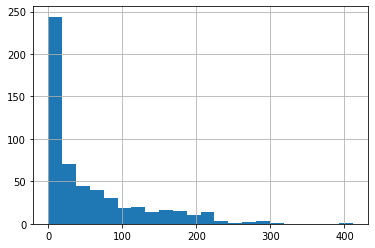

In [47]:
df_all_pff['fantasyPts'].hist(bins='auto')
#df_all_pff['ptsPerSnap'].value_counts()

In [48]:
df_all_pff.dropna(subset=['ptsPerSnap'], inplace=True)

In [49]:
df_all_pff.isna().sum()

player              0
team                0
games               0
position            0
recTarg             0
recRec              0
recRec40s           0
recYds              0
recYds100Games      0
recTds              0
recTd40s            0
recDrops            0
catch               0
depth               0
ypt                 0
ypr                 0
rac                 0
rushCarries         0
rush40s             0
rushYds             0
rushYds100Games     0
rushTds             0
rushTd40s           0
ypc                 0
yac                 0
rushTa              0
fantasyPts          0
ptsPerSnap          0
ptsPerTouch        60
year                0
dtype: int64

-1.10    1
 0.00    1
 0.15    1
 0.20    2
 0.23    1
        ..
 4.90    1
 5.30    1
 5.93    1
 6.10    2
 6.60    1
Name: ptsPerTouch, Length: 248, dtype: int64

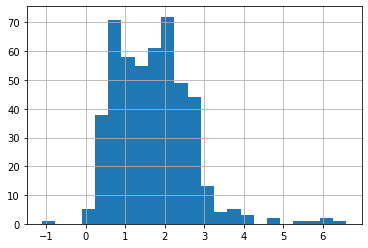

In [50]:
df_all_pff['ptsPerTouch'].hist(bins='auto')
df_all_pff['ptsPerTouch'].value_counts().sort_index()

In [51]:
df_all_pff.loc[df_all_pff['ptsPerTouch']==0.00]

,player,team,games,position,recTarg,recRec,recRec40s,recYds,recYds100Games,recTds,recTd40s,recDrops,catch,depth,ypt,ypr,rac,rushCarries,rush40s,rushYds,rushYds100Games,rushTds,rushTd40s,ypc,yac,rushTa,fantasyPts,ptsPerSnap,ptsPerTouch,year
406,Melvin Ingram III,LAC,1,RB,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1,0,0,0,0,0,0.0,0.0,0,13.5,0.0,0.0,2018


In [52]:
df_all_pff.loc[df_all_pff['ptsPerTouch'].isna()]

,player,team,games,position,recTarg,recRec,recRec40s,recYds,recYds100Games,recTds,recTd40s,recDrops,catch,depth,ypt,ypr,rac,rushCarries,rush40s,rushYds,rushYds100Games,rushTds,rushTd40s,ypc,yac,rushTa,fantasyPts,ptsPerSnap,ptsPerTouch,year
16,Chris Lacy,DET,1,WR,1,0,0,0,0,0,0,0,0.0,10.00,0.0,0.0,0.0,0,0,0,0,0,0,0.0,0.0,0,1.7,0.0,NaN,2018
24,Malachi Dupre,ARZ,1,WR,0,0,0,0,0,0,0,0,0.0,0.00,0.0,0.0,0.0,0,0,0,0,0,0,0.0,0.0,0,5.8,0.0,NaN,2018
31,Jaydon Mickens,JAX,1,WR,0,0,0,0,0,0,0,0,0.0,0.00,0.0,0.0,0.0,0,0,0,0,0,0,0.0,0.0,0,27.9,0.0,NaN,2018
32,Max McCaffrey,SF,1,WR,0,0,0,0,0,0,0,0,0.0,0.00,0.0,0.0,0.0,0,0,0,0,0,0,0.0,0.0,0,4.4,0.0,NaN,2018
33,Johnny Holton,OAK,1,WR,1,0,0,0,0,0,0,0,0.0,40.00,0.0,0.0,0.0,0,0,0,0,0,0,0.0,0.0,0,179.7,0.0,NaN,2018
35,Alonzo Russell,NYG,1,WR,0,0,0,0,0,0,0,0,0.0,0.00,0.0,0.0,0.0,0,0,0,0,0,0,0.0,0.0,0,14.1,0.0,NaN,2018
37,Mose Frazier,CAR,1,WR,0,0,0,0,0,0,0,0,0.0,0.00,0.0,0.0,0.0,0,0,0,0,0,0,0.0,0.0,0,8.0,0.0,NaN,2018
44,Bradley Marquez,DET,1,WR,0,0,0,0,0,0,0,0,0.0,0.00,0.0,0.0,0.0,0,0,0,0,0,0,0.0,0.0,0,223.5,0.0,NaN,2018
74,Mike Wallace,PHI,2,WR,3,0,0,0,0,0,0,0,0.0,35.67,0.0,0.0,0.0,0,0,0,0,0,0,0.0,0.0,0,3.0,0.0,NaN,2018
80,Da'Mari Scott,BUF,1,WR,0,0,0,0,0,0,0,0,0.0,0.00,0.0,0.0,0.0,0,0,0,0,0,0,0.0,0.0,0,35.4,0.0,NaN,2018


In [53]:
df_all_pff['ptsPerTouch'].fillna(0.00, inplace=True)

In [54]:
df_all_pff.isna().sum()

player             0
team               0
games              0
position           0
recTarg            0
recRec             0
recRec40s          0
recYds             0
recYds100Games     0
recTds             0
recTd40s           0
recDrops           0
catch              0
depth              0
ypt                0
ypr                0
rac                0
rushCarries        0
rush40s            0
rushYds            0
rushYds100Games    0
rushTds            0
rushTd40s          0
ypc                0
yac                0
rushTa             0
fantasyPts         0
ptsPerSnap         0
ptsPerTouch        0
year               0
dtype: int64

In [55]:
df_all_pff.dtypes

player              object
team                object
games                int64
position            object
recTarg              int64
recRec               int64
recRec40s            int64
recYds               int64
recYds100Games       int64
recTds               int64
recTd40s             int64
recDrops             int64
catch              float64
depth              float64
ypt                float64
ypr                float64
rac                float64
rushCarries          int64
rush40s              int64
rushYds              int64
rushYds100Games      int64
rushTds              int64
rushTd40s            int64
ypc                float64
yac                float64
rushTa               int64
fantasyPts         float64
ptsPerSnap         float64
ptsPerTouch        float64
year                 int64
dtype: object

### Clean PFF df to CSV

In [56]:
#Save nice clean PFF data to CSV
df_all_pff.to_csv('allpff.csv')

### Final PFF DataFrame

In [57]:
df_all_pff['team'].unique()

array(['HST', 'JAX', 'CLV', 'CAR', 'ATL', 'BUF', 'CIN', 'DEN', 'GB', 'SF',
       'SEA', 'ARZ', 'PIT', 'DET', 'LA', 'DAL', 'OAK', 'TB', 'TEN', 'NYG',
       'WAS', 'MIA', 'NO', 'MIN', 'NE', 'CHI', 'NYJ', 'KC', 'PHI', 'IND',
       'BLT', 'LAC'], dtype=object)

## Football Outsiders (df_FO)

### FO Key / Abbreviations 

In [58]:
df_FO.head(1)

,RK_TEAM,TEAM,OFFENSEDVOA,LASTYEAR,WEI.OFFENSE,RK_WEI.OFFENSE,PASSOFF,RK_PASSOFF,RUSHOFF,RK_RUSHOFF,NON-ADJTOTAL,NON-ADJPASS,NON-ADJRUSH,VAR,RK_VAR,SCHED,RK_SCHED
0,1,KC,34.2,4,30.6,1,62.9,1,11.0,4,33.1,60.2,12.2,7.7,22,-0.9,11



* DVOA: calculates a team's success based on the down-and-distance of each play during the season, then calculates how much more or less successful each team is compared to the league average.
* WEI: The WEIGHTED OFFENSE is adjusted so that earlier games in the season become gradually less important. It better reflects how the team was playing at the end of the season.


In [59]:
"KC" in df_FO['TEAM']

False

In [60]:
df_FO.isna().sum()

RK_TEAM           0
TEAM              0
OFFENSEDVOA       0
LASTYEAR          0
WEI.OFFENSE       0
RK_WEI.OFFENSE    0
PASSOFF           0
RK_PASSOFF        0
RUSHOFF           0
RK_RUSHOFF        0
NON-ADJTOTAL      0
NON-ADJPASS       0
NON-ADJRUSH       0
VAR               0
RK_VAR            0
SCHED             0
RK_SCHED          0
dtype: int64

In [61]:
# realized don't need VAR and SCHED
df_FO.drop(['VAR', 'SCHED'], axis=1, inplace=True)
df_FO.head(2)

,RK_TEAM,TEAM,OFFENSEDVOA,LASTYEAR,WEI.OFFENSE,RK_WEI.OFFENSE,PASSOFF,RK_PASSOFF,RUSHOFF,RK_RUSHOFF,NON-ADJTOTAL,NON-ADJPASS,NON-ADJRUSH,RK_VAR,RK_SCHED
0,1,KC,34.2,4,30.6,1,62.9,1,11.0,4,33.1,60.2,12.2,22,11
1,2,LAR,24.6,6,19.3,2,32.9,5,21.3,1,24.1,32.7,20.4,28,15


In [62]:
# Look-up team names for PFF
df_all_pff['team']

0      HST
1      JAX
2      CLV
3      CAR
4      ATL
      ... 
543    ARZ
544    OAK
545    CAR
546    TEN
547     NO
Name: team, Length: 546, dtype: object

In [63]:
# Match team names of PFF & Football Outsiders
df_FO['TEAM']

0      KC
1     LAR
2     LAC
3      NO
4      NE
5     PIT
6      GB
7     ATL
8     SEA
9     IND
10    CAR
11     TB
12    NYG
13    DEN
14    BAL
15    PHI
16    CLE
17    MIN
18    CIN
19    CHI
20    HOU
21    TEN
22    DET
23    DAL
24    OAK
25    MIA
26     SF
27    NYJ
28    WAS
29    JAX
30    BUF
31    ARI
Name: TEAM, dtype: object

### Match Team Names
* BLT, BAL
* ARZ, ARI
* LA, LAR
* CLV, CLE
* HST, HOU

In [64]:
df_FO['TEAM'].replace('BAL', 'BLT', inplace=True)

In [65]:
df_FO['TEAM'].replace('ARI', 'ARZ', inplace=True)

In [66]:
df_FO['TEAM'].replace('LAR', 'LA', inplace=True)

In [67]:
df_FO['TEAM'].replace('CLE', 'CLV', inplace=True)

In [68]:
df_FO['TEAM'].replace('HOU', 'HST', inplace=True)

In [69]:
df_FO.head(32)

,RK_TEAM,TEAM,OFFENSEDVOA,LASTYEAR,WEI.OFFENSE,RK_WEI.OFFENSE,PASSOFF,RK_PASSOFF,RUSHOFF,RK_RUSHOFF,NON-ADJTOTAL,NON-ADJPASS,NON-ADJRUSH,RK_VAR,RK_SCHED
0,1,KC,34.2,4,30.6,1,62.9,1,11.0,4,33.1,60.2,12.2,22,11
1,2,LA,24.6,6,19.3,2,32.9,5,21.3,1,24.1,32.7,20.4,28,15
2,3,LAC,20.7,7,17.1,3,41.6,2,4.2,7,21.2,39.8,7.4,8,17
3,4,NO,15.9,2,13.4,7,34.5,3,3.3,8,17.5,36.8,4.3,18,31
4,5,NE,14.5,1,16.1,4,33.0,4,2.5,9,13.9,32.4,2.1,5,4
5,6,PIT,13.8,3,15.0,6,25.5,8,-2.4,12,12.9,22.4,0.8,14,22
6,7,GB,11.1,15,10.4,10,18.0,12,12.4,3,8.9,13.8,13.9,17,5
7,8,ATL,8.8,9,7.8,11,26.7,7,-10.7,22,11.7,29.5,-7.5,26,30
8,9,SEA,8.8,14,11.3,9,27.2,6,4.3,6,11.0,32.2,4.5,7,16
9,10,IND,8.2,29,15.9,5,21.3,10,-3.2,13,7.9,21.9,-5.1,12,14


In [70]:
df_all_pff.head(1)

,player,team,games,position,recTarg,recRec,recRec40s,recYds,recYds100Games,recTds,recTd40s,recDrops,catch,depth,ypt,ypr,rac,rushCarries,rush40s,rushYds,rushYds100Games,rushTds,rushTd40s,ypc,yac,rushTa,fantasyPts,ptsPerSnap,ptsPerTouch,year
0,Vyncint Smith,HST,6,WR,9,5,0,91,0,1,0,1,55.6,23.33,10.11,18.2,0.8,0,0,0,0,0,0,0.0,0.0,0,14.6,0.1,3.52,2018


In [71]:
df_FO.head(1)

,RK_TEAM,TEAM,OFFENSEDVOA,LASTYEAR,WEI.OFFENSE,RK_WEI.OFFENSE,PASSOFF,RK_PASSOFF,RUSHOFF,RK_RUSHOFF,NON-ADJTOTAL,NON-ADJPASS,NON-ADJRUSH,RK_VAR,RK_SCHED
0,1,KC,34.2,4,30.6,1,62.9,1,11.0,4,33.1,60.2,12.2,22,11


## Merge all Data (df)


In [72]:
"KC" in df_all_pff['team']

False

In [73]:
#Merge
df = df_all_pff.merge(df_FO, how = 'left', left_on= 'team', right_on= 'TEAM')
df.shape

(546, 45)

In [74]:
df.drop('TEAM' , axis=1, inplace=True)

In [75]:
df[df.isna().any(axis=1)]

,player,team,games,position,recTarg,recRec,recRec40s,recYds,recYds100Games,recTds,recTd40s,recDrops,catch,depth,ypt,ypr,rac,rushCarries,rush40s,rushYds,rushYds100Games,rushTds,rushTd40s,ypc,yac,rushTa,fantasyPts,ptsPerSnap,ptsPerTouch,year,RK_TEAM,OFFENSEDVOA,LASTYEAR,WEI.OFFENSE,RK_WEI.OFFENSE,PASSOFF,RK_PASSOFF,RUSHOFF,RK_RUSHOFF,NON-ADJTOTAL,NON-ADJPASS,NON-ADJRUSH,RK_VAR,RK_SCHED


In [76]:
#df.drop(['VAR', 'SCHED'], axis=1, inplace=True)


## Outliers

### z-scores

In [77]:
def find_outliers_Z(data):
    """Use scipy to calculate absolute Z-scores 
    and return boolean series where True indicates it is an outlier.
    Args:
        data (Series,or ndarray): data to test for outliers.
    Returns:
        [boolean Series]: A True/False for each row use to slice outliers.
        
    EXAMPLE USE: 
    >> idx_outs = find_outliers_df(df['AdjustedCompensation'])
    >> good_data = df[~idx_outs].copy()
    """
    import pandas as pd
    import numpy as np
    import scipy.stats as stats
    import pandas as pd
    import numpy as np
    ## Calculate z-scores
    zs = stats.zscore(data)
    
    ## Find z-scores >3 awayfrom mean
    idx_outs = np.abs(zs)>3
    
    ## If input was a series, make idx_outs index match
    if isinstance(data,pd.Series):
        return pd.Series(idx_outs,index=data.index)
    else:
        return pd.Series(idx_outs)
    

In [78]:
temp_rb = df.groupby('position').get_group('RB')['fantasyPts']

In [79]:
idx_outs = find_outliers_Z(temp_rb)

In [80]:
temp_rb[idx_outs]

321    411.2
Name: fantasyPts, dtype: float64

In [81]:
temp_rb = temp_rb[~idx_outs]

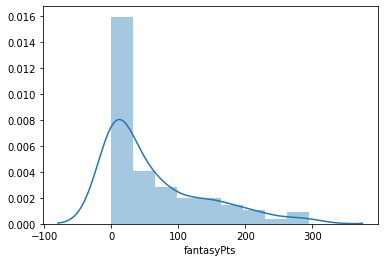

In [82]:
sns.distplot(temp_rb[~idx_outs])

In [83]:
idx_fantasyPts = df.loc[df['fantasyPts']>299].index
idx_fantasyPts
df.drop(idx_fantasyPts, axis=0, inplace=True)
df.loc[df['fantasyPts']>299]

,player,team,games,position,recTarg,recRec,recRec40s,recYds,recYds100Games,recTds,recTd40s,recDrops,catch,depth,ypt,ypr,rac,rushCarries,rush40s,rushYds,rushYds100Games,rushTds,rushTd40s,ypc,yac,rushTa,fantasyPts,ptsPerSnap,ptsPerTouch,year,RK_TEAM,OFFENSEDVOA,LASTYEAR,WEI.OFFENSE,RK_WEI.OFFENSE,PASSOFF,RK_PASSOFF,RUSHOFF,RK_RUSHOFF,NON-ADJTOTAL,NON-ADJPASS,NON-ADJRUSH,RK_VAR,RK_SCHED


## Binning Data

In [84]:
#import plotly.express as px

In [85]:
#px.histogram(df, x='fantasyPts', marginal='rug', color = 'position')

In [86]:
#px.strip(df, x='fantasyPts', orientation ='h', color = 'position')

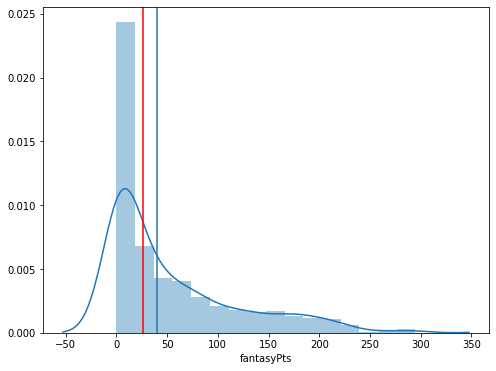

In [87]:
ax = sns.distplot(df['fantasyPts'],bins='auto')
ax.get_figure().set_size_inches((8,6))
[ax.axvline(x) for x in [40]]
[ax.axvline(df['fantasyPts'].median(),color='red')]


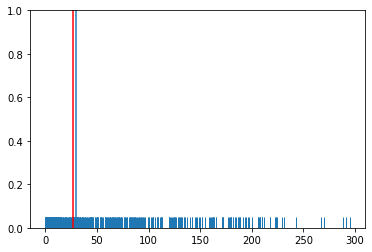

In [88]:
ax = sns.rugplot(df['fantasyPts'])
[ax.axvline(x) for x in [30]]
[ax.axvline(df['fantasyPts'].median(),color='red')];

In [89]:
df['fantasyPts'].describe()

count    544.000000
mean      53.468199
std       64.748370
min        0.000000
25%        3.675000
50%       26.500000
75%       82.325000
max      294.800000
Name: fantasyPts, dtype: float64

In [90]:
bins = [-10, 30, np.inf]
labels = [0,1]
df['score bins'] = pd.cut(df['fantasyPts'], bins=bins, labels=labels)
df['score bins'] = df['score bins'].astype(int)
df.head()

,player,team,games,position,recTarg,recRec,recRec40s,recYds,recYds100Games,recTds,recTd40s,recDrops,catch,depth,ypt,ypr,rac,rushCarries,rush40s,rushYds,rushYds100Games,rushTds,rushTd40s,ypc,yac,rushTa,fantasyPts,ptsPerSnap,ptsPerTouch,year,RK_TEAM,OFFENSEDVOA,LASTYEAR,WEI.OFFENSE,RK_WEI.OFFENSE,PASSOFF,RK_PASSOFF,RUSHOFF,RK_RUSHOFF,NON-ADJTOTAL,NON-ADJPASS,NON-ADJRUSH,RK_VAR,RK_SCHED,score bins
0,Vyncint Smith,HST,6,WR,9,5,0,91,0,1,0,1,55.6,23.33,10.11,18.20,0.80,0,0,0,0,0,0,0.00,0.00,0,14.6,0.10,3.52,2018,21,-3.5,25,-1.4,20,17.8,13,-13.0,26,-3.2,17.4,-11.8,20,6,0
1,Keelan Cole,JAX,16,WR,64,38,0,491,1,1,0,6,59.4,10.19,7.67,12.92,3.63,0,0,0,0,0,0,0.00,0.00,0,5.6,0.11,1.95,2018,30,-22.0,16,-26.6,30,-24.3,30,-10.6,21,-21.8,-20.8,-14.4,13,10,0
2,Derrick Willies,CLV,4,WR,5,3,0,61,0,0,0,0,60.0,11.80,12.20,20.33,11.00,0,0,0,0,0,0,0.00,0.00,0,0.0,0.25,2.53,2018,17,-1.1,32,12.3,8,7.8,21,-6.6,17,1.3,8.6,-2.1,19,24,0
3,D.J. Moore,CAR,16,WR,76,54,3,781,1,2,1,4,71.1,9.62,10.28,14.46,7.91,13,0,172,0,0,0,13.23,7.77,6,66.7,0.18,2.00,2018,11,6.0,17,4.1,12,9.2,19,12.9,2,10.7,16.3,14.7,21,32,1
4,Calvin Ridley,ATL,16,WR,91,64,4,821,1,10,3,8,70.3,10.38,9.02,12.83,5.73,5,0,24,0,0,0,4.80,3.00,1,0.0,0.27,2.56,2018,8,8.8,9,7.8,11,26.7,7,-10.7,22,11.7,29.5,-7.5,26,30,0


In [91]:
#df.dtypes

## Scaling

In [92]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 544 entries, 0 to 545
Data columns (total 45 columns):
player             544 non-null object
team               544 non-null object
games              544 non-null int64
position           544 non-null object
recTarg            544 non-null int64
recRec             544 non-null int64
recRec40s          544 non-null int64
recYds             544 non-null int64
recYds100Games     544 non-null int64
recTds             544 non-null int64
recTd40s           544 non-null int64
recDrops           544 non-null int64
catch              544 non-null float64
depth              544 non-null float64
ypt                544 non-null float64
ypr                544 non-null float64
rac                544 non-null float64
rushCarries        544 non-null int64
rush40s            544 non-null int64
rushYds            544 non-null int64
rushYds100Games    544 non-null int64
rushTds            544 non-null int64
rushTd40s          544 non-null int64
ypc     

In [93]:
cols_to_drop = ['fantasyPts', 'year']
df.drop(columns=cols_to_drop, inplace=True)

In [94]:
#Number cols to scale
number_cols = list(df.drop('score bins', axis =1).select_dtypes('number').columns)
number_cols

['games',
 'recTarg',
 'recRec',
 'recRec40s',
 'recYds',
 'recYds100Games',
 'recTds',
 'recTd40s',
 'recDrops',
 'catch',
 'depth',
 'ypt',
 'ypr',
 'rac',
 'rushCarries',
 'rush40s',
 'rushYds',
 'rushYds100Games',
 'rushTds',
 'rushTd40s',
 'ypc',
 'yac',
 'rushTa',
 'ptsPerSnap',
 'ptsPerTouch',
 'RK_TEAM',
 'OFFENSEDVOA',
 'LASTYEAR',
 'WEI.OFFENSE',
 'RK_WEI.OFFENSE',
 'PASSOFF',
 'RK_PASSOFF',
 'RUSHOFF',
 'RK_RUSHOFF',
 'NON-ADJTOTAL',
 'NON-ADJPASS',
 'NON-ADJRUSH',
 'RK_VAR',
 'RK_SCHED']

In [95]:
df.shape

(544, 43)

In [96]:
df.head()

,player,team,games,position,recTarg,recRec,recRec40s,recYds,recYds100Games,recTds,recTd40s,recDrops,catch,depth,ypt,ypr,rac,rushCarries,rush40s,rushYds,rushYds100Games,rushTds,rushTd40s,ypc,yac,rushTa,ptsPerSnap,ptsPerTouch,RK_TEAM,OFFENSEDVOA,LASTYEAR,WEI.OFFENSE,RK_WEI.OFFENSE,PASSOFF,RK_PASSOFF,RUSHOFF,RK_RUSHOFF,NON-ADJTOTAL,NON-ADJPASS,NON-ADJRUSH,RK_VAR,RK_SCHED,score bins
0,Vyncint Smith,HST,6,WR,9,5,0,91,0,1,0,1,55.6,23.33,10.11,18.20,0.80,0,0,0,0,0,0,0.00,0.00,0,0.10,3.52,21,-3.5,25,-1.4,20,17.8,13,-13.0,26,-3.2,17.4,-11.8,20,6,0
1,Keelan Cole,JAX,16,WR,64,38,0,491,1,1,0,6,59.4,10.19,7.67,12.92,3.63,0,0,0,0,0,0,0.00,0.00,0,0.11,1.95,30,-22.0,16,-26.6,30,-24.3,30,-10.6,21,-21.8,-20.8,-14.4,13,10,0
2,Derrick Willies,CLV,4,WR,5,3,0,61,0,0,0,0,60.0,11.80,12.20,20.33,11.00,0,0,0,0,0,0,0.00,0.00,0,0.25,2.53,17,-1.1,32,12.3,8,7.8,21,-6.6,17,1.3,8.6,-2.1,19,24,0
3,D.J. Moore,CAR,16,WR,76,54,3,781,1,2,1,4,71.1,9.62,10.28,14.46,7.91,13,0,172,0,0,0,13.23,7.77,6,0.18,2.00,11,6.0,17,4.1,12,9.2,19,12.9,2,10.7,16.3,14.7,21,32,1
4,Calvin Ridley,ATL,16,WR,91,64,4,821,1,10,3,8,70.3,10.38,9.02,12.83,5.73,5,0,24,0,0,0,4.80,3.00,1,0.27,2.56,8,8.8,9,7.8,11,26.7,7,-10.7,22,11.7,29.5,-7.5,26,30,0


### Scale Data

In [97]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler
y=df['score bins'].copy()
X=df.drop('score bins', axis=1).copy()

In [98]:
scaler = StandardScaler()

In [99]:
X[number_cols] = scaler.fit_transform(X[number_cols])


In [100]:
X.describe().round(3)

,games,recTarg,recRec,recRec40s,recYds,recYds100Games,recTds,recTd40s,recDrops,catch,depth,ypt,ypr,rac,rushCarries,rush40s,rushYds,rushYds100Games,rushTds,rushTd40s,ypc,yac,rushTa,ptsPerSnap,ptsPerTouch,RK_TEAM,OFFENSEDVOA,LASTYEAR,WEI.OFFENSE,RK_WEI.OFFENSE,PASSOFF,RK_PASSOFF,RUSHOFF,RK_RUSHOFF,NON-ADJTOTAL,NON-ADJPASS,NON-ADJRUSH,RK_VAR,RK_SCHED
count,544.000,544.000,544.000,544.000,544.000,544.000,544.000,544.000,544.000,544.000,544.000,544.000,544.000,544.000,544.000,544.000,544.000,544.000,544.000,544.000,544.000,544.000,544.000,544.000,544.000,544.000,544.000,544.000,544.000,544.000,544.000,544.000,544.000,544.000,544.000,544.000,544.000,544.000,544.000
mean,-0.000,0.000,0.000,0.000,0.000,-0.000,0.000,0.000,-0.000,0.000,0.000,-0.000,-0.000,0.000,0.000,-0.000,-0.000,0.000,-0.000,-0.000,0.000,-0.000,0.000,-0.000,-0.000,0.000,-0.000,0.000,0.000,-0.000,-0.000,-0.000,0.000,0.000,-0.000,-0.000,0.000,-0.000,-0.000
std,1.001,1.001,1.001,1.001,1.001,1.001,1.001,1.001,1.001,1.001,1.001,1.001,1.001,1.001,1.001,1.001,1.001,1.001,1.001,1.001,1.001,1.001,1.001,1.001,1.001,1.001,1.001,1.001,1.001,1.001,1.001,1.001,1.001,1.001,1.001,1.001,1.001,1.001,1.001
min,-1.932,-0.849,-0.840,-0.460,-0.766,-0.324,-0.658,-0.351,-0.751,-2.131,-1.806,-1.679,-1.571,-1.379,-0.402,-0.206,-0.444,-0.235,-0.334,-0.142,-3.680,-1.861,-0.381,-1.324,-2.499,-1.741,-2.562,-1.746,-2.732,-1.749,-2.527,-1.732,-1.665,-1.745,-2.493,-2.566,-1.866,-1.709,-1.663
25%,-0.842,-0.764,-0.760,-0.460,-0.706,-0.324,-0.658,-0.351,-0.751,-0.219,-0.935,-0.513,-0.465,-0.667,-0.402,-0.206,-0.397,-0.235,-0.334,-0.142,-0.595,-0.704,-0.381,-0.583,-0.750,-0.878,-0.366,-0.868,-0.580,-0.885,-0.433,-0.868,-0.653,-0.872,-0.527,-0.416,-0.649,-0.844,-0.907
50%,0.153,-0.368,-0.380,-0.460,-0.429,-0.324,-0.232,-0.351,-0.232,0.235,-0.038,0.115,0.050,-0.079,-0.402,-0.206,-0.397,-0.235,-0.334,-0.142,-0.595,-0.704,-0.381,-0.151,-0.015,0.092,0.009,0.010,0.016,0.087,0.114,-0.003,-0.156,0.111,0.100,0.165,-0.113,0.021,-0.044
75%,0.911,0.396,0.401,0.444,0.251,-0.324,0.194,-0.351,0.287,0.621,0.641,0.596,0.551,0.606,-0.287,-0.206,-0.271,-0.235,-0.334,-0.142,0.566,0.640,-0.256,0.405,0.647,0.846,0.661,0.887,0.804,0.842,0.652,0.861,0.759,0.876,0.766,0.578,0.728,0.886,0.928
max,1.101,3.846,4.162,6.770,4.612,8.032,5.735,6.472,4.957,1.308,5.228,4.539,6.577,5.299,5.466,13.542,5.767,8.290,8.131,13.320,5.295,5.659,5.237,11.521,4.858,1.601,2.302,1.655,2.029,1.598,2.395,1.617,2.589,1.640,2.200,2.293,2.275,1.644,1.684


In [101]:
X.head()

,player,team,games,position,recTarg,recRec,recRec40s,recYds,recYds100Games,recTds,recTd40s,recDrops,catch,depth,ypt,ypr,rac,rushCarries,rush40s,rushYds,rushYds100Games,rushTds,rushTd40s,ypc,yac,rushTa,ptsPerSnap,ptsPerTouch,RK_TEAM,OFFENSEDVOA,LASTYEAR,WEI.OFFENSE,RK_WEI.OFFENSE,PASSOFF,RK_PASSOFF,RUSHOFF,RK_RUSHOFF,NON-ADJTOTAL,NON-ADJPASS,NON-ADJRUSH,RK_VAR,RK_SCHED
0,Vyncint Smith,HST,-0.794842,WR,-0.594104,-0.639813,-0.460212,-0.473977,-0.324093,-0.231899,-0.351209,-0.231783,-0.218566,2.621930,0.940242,1.518507,-1.141818,-0.402371,-0.20579,-0.396719,-0.235079,-0.334091,-0.142293,-0.595174,-0.703796,-0.381196,-0.397999,1.915393,0.415156,-0.133544,0.887350,-0.002661,0.302425,0.373619,-0.435547,-0.749898,0.984937,-0.123684,0.351093,-0.604666,0.345722,-1.123390
1,Keelan Cole,JAX,1.100792,WR,0.961202,0.680712,-0.460212,0.808699,0.511483,-0.231899,-0.351209,2.362665,-0.087892,0.568046,0.308051,0.622323,-0.301830,-0.402371,-0.20579,-0.396719,-0.235079,-0.334091,-0.142293,-0.595174,-0.703796,-0.381196,-0.336245,0.415270,1.385371,-1.328521,-0.100028,-1.602462,1.381947,-1.513670,1.401177,-0.516270,0.438865,-1.314549,-1.381923,-0.837176,-0.411328,-0.691500
2,Derrick Willies,CLV,-1.173969,WR,-0.707218,-0.719845,-0.460212,-0.570178,-0.324093,-0.658091,-0.351209,-0.750673,-0.067259,0.819702,1.481750,1.880036,1.885701,-0.402371,-0.20579,-0.396719,-0.235079,-0.334091,-0.142293,-0.595174,-0.703796,-0.381196,0.528319,0.969456,-0.016051,0.021480,1.655310,0.867073,-0.993001,-0.074668,0.428794,-0.126889,0.002008,0.164429,-0.048136,0.262773,0.237572,0.820114
3,D.J. Moore,CAR,1.100792,WR,1.300542,1.320966,2.251219,1.738639,0.511483,0.194293,1.354665,1.324885,0.314448,0.478951,0.984288,0.883710,0.968541,-0.151417,-0.20579,0.342565,-0.235079,-0.334091,-0.142293,3.115349,3.790902,0.367885,0.096037,0.463045,-0.662862,0.480092,0.009680,0.346502,-0.561193,-0.011908,0.212709,1.771343,-1.636208,0.766264,0.301190,1.765143,0.453872,1.683894
4,Calvin Ridley,ATL,1.100792,WR,1.724717,1.721125,3.155029,1.866906,0.511483,3.603829,4.766413,3.400444,0.286938,0.597745,0.657829,0.607047,0.321483,-0.305850,-0.20579,-0.293563,-0.235079,-0.334091,-0.142293,0.751048,1.031609,-0.256349,0.651829,0.998120,-0.986267,0.660954,-0.867989,0.581394,-0.669145,0.772595,-1.083802,-0.526004,0.548080,0.830289,0.900033,-0.220131,0.994622,1.467949


## One Hot Encoding

In [102]:
categ_cols = ['team']

In [103]:
#make categorical / One Hot Encoding

X = pd.get_dummies(X, columns= categ_cols)
X.head(2)

,player,games,position,recTarg,recRec,recRec40s,recYds,recYds100Games,recTds,recTd40s,recDrops,catch,depth,ypt,ypr,rac,rushCarries,rush40s,rushYds,rushYds100Games,rushTds,rushTd40s,ypc,yac,rushTa,ptsPerSnap,ptsPerTouch,RK_TEAM,OFFENSEDVOA,LASTYEAR,WEI.OFFENSE,RK_WEI.OFFENSE,PASSOFF,RK_PASSOFF,RUSHOFF,RK_RUSHOFF,NON-ADJTOTAL,NON-ADJPASS,NON-ADJRUSH,RK_VAR,RK_SCHED,team_ARZ,team_ATL,team_BLT,team_BUF,team_CAR,team_CHI,team_CIN,team_CLV,team_DAL,team_DEN,team_DET,team_GB,team_HST,team_IND,team_JAX,team_KC,team_LA,team_LAC,team_MIA,team_MIN,team_NE,team_NO,team_NYG,team_NYJ,team_OAK,team_PHI,team_PIT,team_SEA,team_SF,team_TB,team_TEN,team_WAS
0,Vyncint Smith,-0.794842,WR,-0.594104,-0.639813,-0.460212,-0.473977,-0.324093,-0.231899,-0.351209,-0.231783,-0.218566,2.621930,0.940242,1.518507,-1.141818,-0.402371,-0.20579,-0.396719,-0.235079,-0.334091,-0.142293,-0.595174,-0.703796,-0.381196,-0.397999,1.915393,0.415156,-0.133544,0.887350,-0.002661,0.302425,0.373619,-0.435547,-0.749898,0.984937,-0.123684,0.351093,-0.604666,0.345722,-1.12339,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,Keelan Cole,1.100792,WR,0.961202,0.680712,-0.460212,0.808699,0.511483,-0.231899,-0.351209,2.362665,-0.087892,0.568046,0.308051,0.622323,-0.301830,-0.402371,-0.20579,-0.396719,-0.235079,-0.334091,-0.142293,-0.595174,-0.703796,-0.381196,-0.336245,0.415270,1.385371,-1.328521,-0.100028,-1.602462,1.381947,-1.513670,1.401177,-0.516270,0.438865,-1.314549,-1.381923,-0.837176,-0.411328,-0.69150,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


## get_group WR (df_wr)

In [104]:
df2 = pd.concat([y, X], axis =1)
df2.head()

,score bins,player,games,position,recTarg,recRec,recRec40s,recYds,recYds100Games,recTds,recTd40s,recDrops,catch,depth,ypt,ypr,rac,rushCarries,rush40s,rushYds,rushYds100Games,rushTds,rushTd40s,ypc,yac,rushTa,ptsPerSnap,ptsPerTouch,RK_TEAM,OFFENSEDVOA,LASTYEAR,WEI.OFFENSE,RK_WEI.OFFENSE,PASSOFF,RK_PASSOFF,RUSHOFF,RK_RUSHOFF,NON-ADJTOTAL,NON-ADJPASS,NON-ADJRUSH,RK_VAR,RK_SCHED,team_ARZ,team_ATL,team_BLT,team_BUF,team_CAR,team_CHI,team_CIN,team_CLV,team_DAL,team_DEN,team_DET,team_GB,team_HST,team_IND,team_JAX,team_KC,team_LA,team_LAC,team_MIA,team_MIN,team_NE,team_NO,team_NYG,team_NYJ,team_OAK,team_PHI,team_PIT,team_SEA,team_SF,team_TB,team_TEN,team_WAS
0,0,Vyncint Smith,-0.794842,WR,-0.594104,-0.639813,-0.460212,-0.473977,-0.324093,-0.231899,-0.351209,-0.231783,-0.218566,2.621930,0.940242,1.518507,-1.141818,-0.402371,-0.20579,-0.396719,-0.235079,-0.334091,-0.142293,-0.595174,-0.703796,-0.381196,-0.397999,1.915393,0.415156,-0.133544,0.887350,-0.002661,0.302425,0.373619,-0.435547,-0.749898,0.984937,-0.123684,0.351093,-0.604666,0.345722,-1.123390,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,Keelan Cole,1.100792,WR,0.961202,0.680712,-0.460212,0.808699,0.511483,-0.231899,-0.351209,2.362665,-0.087892,0.568046,0.308051,0.622323,-0.301830,-0.402371,-0.20579,-0.396719,-0.235079,-0.334091,-0.142293,-0.595174,-0.703796,-0.381196,-0.336245,0.415270,1.385371,-1.328521,-0.100028,-1.602462,1.381947,-1.513670,1.401177,-0.516270,0.438865,-1.314549,-1.381923,-0.837176,-0.411328,-0.691500,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,Derrick Willies,-1.173969,WR,-0.707218,-0.719845,-0.460212,-0.570178,-0.324093,-0.658091,-0.351209,-0.750673,-0.067259,0.819702,1.481750,1.880036,1.885701,-0.402371,-0.20579,-0.396719,-0.235079,-0.334091,-0.142293,-0.595174,-0.703796,-0.381196,0.528319,0.969456,-0.016051,0.021480,1.655310,0.867073,-0.993001,-0.074668,0.428794,-0.126889,0.002008,0.164429,-0.048136,0.262773,0.237572,0.820114,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,1,D.J. Moore,1.100792,WR,1.300542,1.320966,2.251219,1.738639,0.511483,0.194293,1.354665,1.324885,0.314448,0.478951,0.984288,0.883710,0.968541,-0.151417,-0.20579,0.342565,-0.235079,-0.334091,-0.142293,3.115349,3.790902,0.367885,0.096037,0.463045,-0.662862,0.480092,0.009680,0.346502,-0.561193,-0.011908,0.212709,1.771343,-1.636208,0.766264,0.301190,1.765143,0.453872,1.683894,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,Calvin Ridley,1.100792,WR,1.724717,1.721125,3.155029,1.866906,0.511483,3.603829,4.766413,3.400444,0.286938,0.597745,0.657829,0.607047,0.321483,-0.305850,-0.20579,-0.293563,-0.235079,-0.334091,-0.142293,0.751048,1.031609,-0.256349,0.651829,0.998120,-0.986267,0.660954,-0.867989,0.581394,-0.669145,0.772595,-1.083802,-0.526004,0.548080,0.830289,0.900033,-0.220131,0.994622,1.467949,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [105]:
df2.shape

(544, 74)

In [106]:
df_wr =df2.groupby('position').get_group('WR')
df_wr


,score bins,player,games,position,recTarg,recRec,recRec40s,recYds,recYds100Games,recTds,recTd40s,recDrops,catch,depth,ypt,ypr,rac,rushCarries,rush40s,rushYds,rushYds100Games,rushTds,rushTd40s,ypc,yac,rushTa,ptsPerSnap,ptsPerTouch,RK_TEAM,OFFENSEDVOA,LASTYEAR,WEI.OFFENSE,RK_WEI.OFFENSE,PASSOFF,RK_PASSOFF,RUSHOFF,RK_RUSHOFF,NON-ADJTOTAL,NON-ADJPASS,NON-ADJRUSH,RK_VAR,RK_SCHED,team_ARZ,team_ATL,team_BLT,team_BUF,team_CAR,team_CHI,team_CIN,team_CLV,team_DAL,team_DEN,team_DET,team_GB,team_HST,team_IND,team_JAX,team_KC,team_LA,team_LAC,team_MIA,team_MIN,team_NE,team_NO,team_NYG,team_NYJ,team_OAK,team_PHI,team_PIT,team_SEA,team_SF,team_TB,team_TEN,team_WAS
0,0,Vyncint Smith,-0.794842,WR,-0.594104,-0.639813,-0.460212,-0.473977,-0.324093,-0.231899,-0.351209,-0.231783,-0.218566,2.621930,0.940242,1.518507,-1.141818,-0.402371,-0.20579,-0.396719,-0.235079,-0.334091,-0.142293,-0.595174,-0.703796,-0.381196,-0.397999,1.915393,0.415156,-0.133544,0.887350,-0.002661,0.302425,0.373619,-0.435547,-0.749898,0.984937,-0.123684,0.351093,-0.604666,0.345722,-1.123390,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,Keelan Cole,1.100792,WR,0.961202,0.680712,-0.460212,0.808699,0.511483,-0.231899,-0.351209,2.362665,-0.087892,0.568046,0.308051,0.622323,-0.301830,-0.402371,-0.20579,-0.396719,-0.235079,-0.334091,-0.142293,-0.595174,-0.703796,-0.381196,-0.336245,0.415270,1.385371,-1.328521,-0.100028,-1.602462,1.381947,-1.513670,1.401177,-0.516270,0.438865,-1.314549,-1.381923,-0.837176,-0.411328,-0.691500,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,Derrick Willies,-1.173969,WR,-0.707218,-0.719845,-0.460212,-0.570178,-0.324093,-0.658091,-0.351209,-0.750673,-0.067259,0.819702,1.481750,1.880036,1.885701,-0.402371,-0.20579,-0.396719,-0.235079,-0.334091,-0.142293,-0.595174,-0.703796,-0.381196,0.528319,0.969456,-0.016051,0.021480,1.655310,0.867073,-0.993001,-0.074668,0.428794,-0.126889,0.002008,0.164429,-0.048136,0.262773,0.237572,0.820114,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,1,D.J. Moore,1.100792,WR,1.300542,1.320966,2.251219,1.738639,0.511483,0.194293,1.354665,1.324885,0.314448,0.478951,0.984288,0.883710,0.968541,-0.151417,-0.20579,0.342565,-0.235079,-0.334091,-0.142293,3.115349,3.790902,0.367885,0.096037,0.463045,-0.662862,0.480092,0.009680,0.346502,-0.561193,-0.011908,0.212709,1.771343,-1.636208,0.766264,0.301190,1.765143,0.453872,1.683894,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,Calvin Ridley,1.100792,WR,1.724717,1.721125,3.155029,1.866906,0.511483,3.603829,4.766413,3.400444,0.286938,0.597745,0.657829,0.607047,0.321483,-0.305850,-0.20579,-0.293563,-0.235079,-0.334091,-0.142293,0.751048,1.031609,-0.256349,0.651829,0.998120,-0.986267,0.660954,-0.867989,0.581394,-0.669145,0.772595,-1.083802,-0.526004,0.548080,0.830289,0.900033,-0.220131,0.994622,1.467949,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
233,1,Pierre Garcon,-0.415716,WR,0.310801,0.120489,-0.460212,0.151327,-0.324093,-0.231899,-0.351209,1.324885,-0.118841,0.461757,0.129276,0.452591,-0.153422,-0.402371,-0.20579,-0.396719,-0.235079,-0.334091,-0.142293,-0.595174,-0.703796,-0.381196,-0.274490,0.405715,1.061966,-0.902205,0.229098,-0.961272,1.166042,-0.294329,0.644879,-1.664944,1.640223,-0.840764,-0.338484,-1.302195,-0.086878,0.496197,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
234,1,Matthew Slater,-0.605279,WR,-0.848609,-0.839892,-0.460212,-0.765786,-0.324093,-0.658091,-0.351209,-0.750673,-2.130541,-1.024729,-1.679205,-1.570612,-1.379270,-0.402371,-0.20579,-0.396719,-0.235079,-0.334091,-0.142293,-0.595174,-0.703796,-0.381196,-1.015545,-1.447940,-1.309672,1.029136,-1.745659,1.10831

In [107]:
df_wr.columns

Index(['score bins', 'player', 'games', 'position', 'recTarg', 'recRec',
       'recRec40s', 'recYds', 'recYds100Games', 'recTds', 'recTd40s',
       'recDrops', 'catch', 'depth', 'ypt', 'ypr', 'rac', 'rushCarries',
       'rush40s', 'rushYds', 'rushYds100Games', 'rushTds', 'rushTd40s', 'ypc',
       'yac', 'rushTa', 'ptsPerSnap', 'ptsPerTouch', 'RK_TEAM', 'OFFENSEDVOA',
       'LASTYEAR', 'WEI.OFFENSE', 'RK_WEI.OFFENSE', 'PASSOFF', 'RK_PASSOFF',
       'RUSHOFF', 'RK_RUSHOFF', 'NON-ADJTOTAL', 'NON-ADJPASS', 'NON-ADJRUSH',
       'RK_VAR', 'RK_SCHED', 'team_ARZ', 'team_ATL', 'team_BLT', 'team_BUF',
       'team_CAR', 'team_CHI', 'team_CIN', 'team_CLV', 'team_DAL', 'team_DEN',
       'team_DET', 'team_GB', 'team_HST', 'team_IND', 'team_JAX', 'team_KC',
       'team_LA', 'team_LAC', 'team_MIA', 'team_MIN', 'team_NE', 'team_NO',
       'team_NYG', 'team_NYJ', 'team_OAK', 'team_PHI', 'team_PIT', 'team_SEA',
       'team_SF', 'team_TB', 'team_TEN', 'team_WAS'],
      dtype='object')

## get_group RB (df_rb)

In [108]:
df_rb =df2.groupby('position').get_group('RB')
df_rb


,score bins,player,games,position,recTarg,recRec,recRec40s,recYds,recYds100Games,recTds,recTd40s,recDrops,catch,depth,ypt,ypr,rac,rushCarries,rush40s,rushYds,rushYds100Games,rushTds,rushTd40s,ypc,yac,rushTa,ptsPerSnap,ptsPerTouch,RK_TEAM,OFFENSEDVOA,LASTYEAR,WEI.OFFENSE,RK_WEI.OFFENSE,PASSOFF,RK_PASSOFF,RUSHOFF,RK_RUSHOFF,NON-ADJTOTAL,NON-ADJPASS,NON-ADJRUSH,RK_VAR,RK_SCHED,team_ARZ,team_ATL,team_BLT,team_BUF,team_CAR,team_CHI,team_CIN,team_CLV,team_DAL,team_DEN,team_DET,team_GB,team_HST,team_IND,team_JAX,team_KC,team_LA,team_LAC,team_MIA,team_MIN,team_NE,team_NO,team_NYG,team_NYJ,team_OAK,team_PHI,team_PIT,team_SEA,team_SF,team_TB,team_TEN,team_WAS
238,1,Trenton Cannon,0.532102,RB,-0.113373,-0.159622,-0.460212,-0.304022,-0.324093,-0.658091,-0.351209,1.324885,0.118436,-0.044680,-0.243820,-0.132984,0.784515,0.331187,-0.205790,0.088973,-0.235079,0.163842,-0.142293,0.237801,0.817576,0.742426,0.343056,-0.750430,1.169768,-1.167038,0.777641,-0.948575,1.058090,-0.791927,1.185092,-1.499457,1.421795,-1.372172,-0.882887,-1.865584,1.102772,-1.663252,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
239,1,Nyheim Hines,1.100792,RB,1.357099,1.681109,-0.460212,0.597057,-0.324093,0.194293,-0.351209,1.324885,0.648012,-0.632397,-0.267139,-0.424922,0.223534,1.238482,-0.205790,0.948605,-0.235079,0.661775,-0.142293,0.436929,0.632466,0.367885,0.590074,-0.616661,-0.770664,0.622198,1.326184,1.095616,-1.316858,0.530520,-0.759674,0.204085,-0.434850,0.586994,0.555244,-0.005507,-0.519478,-0.259610,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
240,0,Jaylen Samuels,0.152975,RB,-0.028538,0.200521,-0.460212,-0.127655,-0.324093,0.620485,-0.351209,-0.750673,0.954066,-1.051302,0.098184,-0.272164,1.143662,0.678662,-0.205790,0.703610,0.982856,-0.334091,-0.142293,0.686541,0.817576,-0.006655,1.084111,-0.559332,-1.201871,0.983921,-1.526241,1.038480,-1.208906,0.718800,-0.975760,0.281961,-0.544064,0.907119,0.577928,0.522111,-0.303178,0.604169,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
241,1,Gus Edwards,0.152975,RB,-0.792052,-0.759861,-0.460212,-0.701652,-0.324093,-0.658091,-0.351209,-0.750673,1.308263,-0.790268,0.911742,0.126706,1.143662,2.242298,1.758237,2.689360,3.418726,0.661775,-0.142293,0.874451,1.158872,2.490282,0.837092,-0.855534,-0.231655,0.150666,0.448515,0.003688,0.194473,0.279479,-0.327504,0.330634,-0.762493,0.228454,0.165089,0.727793,-1.600978,1.144032,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
242,1,Mark Walton,-0.226152,RB,-0.650661,-0.639813,-0.460212,-0.634311,-0.324093,-0.658091,-0.351209,-0.231783,0.324765,-1.292015,-0.160910,-0.178811,1.410796,-0.132113,-0.205790,-0.250581,-0.235079,-0.334091,-0.142293,0.086351,0.372155,-0.381196,-0.336245,-0.941529,0.199552,-0.120626,0.558224,-0.548625,0.734234,0.001541,0.104666,0.165147,-0.325636,-0.085269,0.010841,0.244888,0.670172,0.172280,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
406,0,Nick Bellore,0.721665,RB,-0.735496,-0.679829,-0.460212,-0.717685,-0.324093,-0.658091,-0.351209,-0.750673,1.308263,-0.985652,-0.707600,-0.934118,-0.340416,-0.383067,-0.205790,-0.396719,-0.235079,-0.334091,-0.142293,-0.595174,-0.703796,-0.381196,-0.830281,-0.779095,0.630759,-0.243353,-0.538863,-0.085190,0.518329,-0.258466,0.536837,-0.652553,0.875723,-0.379784,-0.415608,-0.640437,-0.195028,-1.447307,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
407,0,Anthony Sherman,1.100792,RB,-0.594104,-0.519765,-0.460212,-0.457944,-0.324093,-0.231899,-0.351209,-0.231783,0.926555,-0.330723,1.085335,0.466170,0.811228,-0.383067,-0.205790,-0.388122,-0.235079,-0.334091,-0.142293,-0.034248,-0.125328,-0.381196,0.219547,0.654143,-1.740879,2.301625,

In [109]:
df_rb.columns

Index(['score bins', 'player', 'games', 'position', 'recTarg', 'recRec',
       'recRec40s', 'recYds', 'recYds100Games', 'recTds', 'recTd40s',
       'recDrops', 'catch', 'depth', 'ypt', 'ypr', 'rac', 'rushCarries',
       'rush40s', 'rushYds', 'rushYds100Games', 'rushTds', 'rushTd40s', 'ypc',
       'yac', 'rushTa', 'ptsPerSnap', 'ptsPerTouch', 'RK_TEAM', 'OFFENSEDVOA',
       'LASTYEAR', 'WEI.OFFENSE', 'RK_WEI.OFFENSE', 'PASSOFF', 'RK_PASSOFF',
       'RUSHOFF', 'RK_RUSHOFF', 'NON-ADJTOTAL', 'NON-ADJPASS', 'NON-ADJRUSH',
       'RK_VAR', 'RK_SCHED', 'team_ARZ', 'team_ATL', 'team_BLT', 'team_BUF',
       'team_CAR', 'team_CHI', 'team_CIN', 'team_CLV', 'team_DAL', 'team_DEN',
       'team_DET', 'team_GB', 'team_HST', 'team_IND', 'team_JAX', 'team_KC',
       'team_LA', 'team_LAC', 'team_MIA', 'team_MIN', 'team_NE', 'team_NO',
       'team_NYG', 'team_NYJ', 'team_OAK', 'team_PHI', 'team_PIT', 'team_SEA',
       'team_SF', 'team_TB', 'team_TEN', 'team_WAS'],
      dtype='object')

#### drop_cols_rb

In [110]:
# dropped these cols because 
# not looking for player names (just their stats), 
# position is already used another merged dataset
#score bins is target variable
# couldn't find PFF description of its rac abbreviation & this could be used multiple stats
drop_cols_rb = ['player', 'position', 'score bins', 'rac',]

In [111]:
df_rb.columns

Index(['score bins', 'player', 'games', 'position', 'recTarg', 'recRec',
       'recRec40s', 'recYds', 'recYds100Games', 'recTds', 'recTd40s',
       'recDrops', 'catch', 'depth', 'ypt', 'ypr', 'rac', 'rushCarries',
       'rush40s', 'rushYds', 'rushYds100Games', 'rushTds', 'rushTd40s', 'ypc',
       'yac', 'rushTa', 'ptsPerSnap', 'ptsPerTouch', 'RK_TEAM', 'OFFENSEDVOA',
       'LASTYEAR', 'WEI.OFFENSE', 'RK_WEI.OFFENSE', 'PASSOFF', 'RK_PASSOFF',
       'RUSHOFF', 'RK_RUSHOFF', 'NON-ADJTOTAL', 'NON-ADJPASS', 'NON-ADJRUSH',
       'RK_VAR', 'RK_SCHED', 'team_ARZ', 'team_ATL', 'team_BLT', 'team_BUF',
       'team_CAR', 'team_CHI', 'team_CIN', 'team_CLV', 'team_DAL', 'team_DEN',
       'team_DET', 'team_GB', 'team_HST', 'team_IND', 'team_JAX', 'team_KC',
       'team_LA', 'team_LAC', 'team_MIA', 'team_MIN', 'team_NE', 'team_NO',
       'team_NYG', 'team_NYJ', 'team_OAK', 'team_PHI', 'team_PIT', 'team_SEA',
       'team_SF', 'team_TB', 'team_TEN', 'team_WAS'],
      dtype='object')

#### drop_cols_wr

In [112]:
# dropped these cols because
# see above cell for reasons why dropped cols for df_rb
# the rest of the cols are stats just for RBs so not needed for WRs
drop_cols_wr = ['player', 'position', 'score bins', 'rushCarries', 'rush40s', 'rushYds', 
                'rushYds100Games', 'rushTds', 'rushTd40s', 'rushTa', 'LASTYEAR', 'rac']

In [113]:
df_wr.columns

Index(['score bins', 'player', 'games', 'position', 'recTarg', 'recRec',
       'recRec40s', 'recYds', 'recYds100Games', 'recTds', 'recTd40s',
       'recDrops', 'catch', 'depth', 'ypt', 'ypr', 'rac', 'rushCarries',
       'rush40s', 'rushYds', 'rushYds100Games', 'rushTds', 'rushTd40s', 'ypc',
       'yac', 'rushTa', 'ptsPerSnap', 'ptsPerTouch', 'RK_TEAM', 'OFFENSEDVOA',
       'LASTYEAR', 'WEI.OFFENSE', 'RK_WEI.OFFENSE', 'PASSOFF', 'RK_PASSOFF',
       'RUSHOFF', 'RK_RUSHOFF', 'NON-ADJTOTAL', 'NON-ADJPASS', 'NON-ADJRUSH',
       'RK_VAR', 'RK_SCHED', 'team_ARZ', 'team_ATL', 'team_BLT', 'team_BUF',
       'team_CAR', 'team_CHI', 'team_CIN', 'team_CLV', 'team_DAL', 'team_DEN',
       'team_DET', 'team_GB', 'team_HST', 'team_IND', 'team_JAX', 'team_KC',
       'team_LA', 'team_LAC', 'team_MIA', 'team_MIN', 'team_NE', 'team_NO',
       'team_NYG', 'team_NYJ', 'team_OAK', 'team_PHI', 'team_PIT', 'team_SEA',
       'team_SF', 'team_TB', 'team_TEN', 'team_WAS'],
      dtype='object')

In [114]:
drop_cols_wr

['player',
 'position',
 'score bins',
 'rushCarries',
 'rush40s',
 'rushYds',
 'rushYds100Games',
 'rushTds',
 'rushTd40s',
 'rushTa',
 'LASTYEAR',
 'rac']

# MODELS

## Functions

In [115]:
def my_train_test_split(df_pos, drop_cols_pos, target='score bins'):

    y =df_pos[target].copy()
    #y.value_counts(normalize=True)

    X = df_pos.drop(columns=drop_cols_pos).copy()

    # An 80/20 split with random_state of 10
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=10)

    display(pd.Series(y_train).value_counts(normalize=True))
    
    return X_train, X_test, y_train, y_test

In [116]:
def evaluate_model(X_test, y_test, classifier):

    from sklearn.metrics import plot_confusion_matrix, accuracy_score, roc_auc_score, roc_curve


    # Make predictions for test data
    y_pred = classifier.predict(X_test)
    if y_test.ndim>1:
        
        y_test = y_test.argmax(axis=1)

    # Calculate accuracy 
    acc = accuracy_score(y_test,y_pred) * 100
    print('Accuracy is :{0}'.format(round(acc, 2)))


    # Create Confusion Matrix
    plot_confusion_matrix(classifier, X_test, y_test, normalize='true',
                          cmap='Blues', display_labels= ['Low Scorers', 'High Scorers'])
    plt.show()

In [117]:
def plot_feature_importances(model):
    n_features = X_train.shape[1]
    sort = pd.Series(model.feature_importances_,index=X_train.columns).sort_values(ascending=True).tail(10)
    sort.plot(kind ='barh')
 
    plt.title('Feature Importance')
    plt.ylabel('Feature')
    
    plt.show()
    
    return sort

def get_corr(df, model, target='score bins'):
    sort = plot_feature_importances(model)
    
    fig, ax = plt.subplots(figsize=(5,5))
    
    df_corr = df.corr()[target]
    df_corr.loc[sort.index].plot(kind='barh', ax=ax)
    ax.set_xlabel('Correlation with Fantasy Points', fontdict=dict(size=12))
           
    ax.set_title('Correlation of Most Important Features', fontdict=dict(size=14))
    ax.axvline(0.0)
    plt.show()
    
    #return fig

## RB Models

### Decesion Tree

#### X and y. Train Test Split 
using my function (see above)

In [118]:
# create var for train test split as well as bins balance
X_train, X_test, y_train, y_test = my_train_test_split(df_rb, drop_cols_rb)

0    0.510949
1    0.489051
Name: score bins, dtype: float64

#### Train & Evaluate (Default Parameters)

Accuracy is :60.0


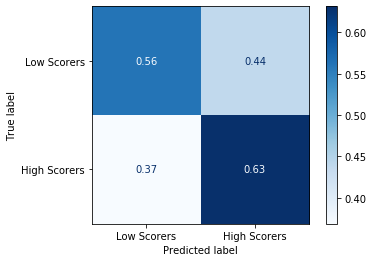

In [119]:
# Train Decesion Tree Classication with default settings
dtree = DecisionTreeClassifier()  
dtree.fit(X_train, y_train) 
evaluate_model(X_test, y_test, dtree) #function for eval acc score & Confusion Matrix

#### Feature Importance & Corr Matrix

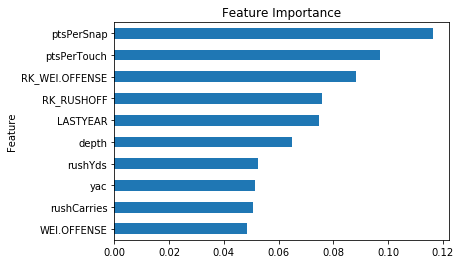

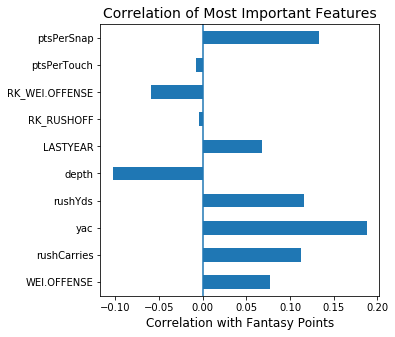

In [120]:
get_corr(df_rb, dtree) 

#### Grid Search

In [121]:
from sklearn.metrics import accuracy_score, plot_confusion_matrix, roc_curve, auc

In [122]:
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV, cross_val_score

In [123]:
model = DecisionTreeClassifier(random_state=10)

In [124]:
# create a dictionary for Combinatoric Grid Searching
dt_param_grid = {
    'criterion': ['gini', 'entropy'],
    'max_features': [None, 5,10, 15, 20,],
    'max_depth': [None, 2, 3, 4, 5, 6],
    'min_samples_split': [2,3,4, 5, 10],
    'min_samples_leaf': [1, 2, 3, 4, 5, 6]
}

# Instantiate GridSearchCV
#dt_grid_search = GridSearchCV(model, dt_param_grid, cv=3, return_train_score=True)

dt_grid_search = RandomizedSearchCV(model, dt_param_grid, n_iter=500, cv=3, 
                                    return_train_score=True)

# Fit to the data
dt_grid_search.fit(X_train, y_train)

RandomizedSearchCV(cv=3, error_score=nan,
                   estimator=DecisionTreeClassifier(ccp_alpha=0.0,
                                                    class_weight=None,
                                                    criterion='gini',
                                                    max_depth=None,
                                                    max_features=None,
                                                    max_leaf_nodes=None,
                                                    min_impurity_decrease=0.0,
                                                    min_impurity_split=None,
                                                    min_samples_leaf=1,
                                                    min_samples_split=2,
                                                    min_weight_fraction_leaf=0.0,
                                                    presort='deprecated',
                                                    random_state=10,
            

#### Grid Search Best Params & Score

In [125]:
dt_grid_search.best_params_

{'min_samples_split': 4,
 'min_samples_leaf': 3,
 'max_features': 10,
 'max_depth': 3,
 'criterion': 'gini'}

In [126]:
dt_grid_search.best_score_

0.656682769726248

In [127]:
dt_best_model = dt_grid_search.best_estimator_
sort = pd.Series(dt_best_model.feature_importances_,
                 index=X_train.columns).sort_values(ascending=False)

sort

rushYds        0.480625
ptsPerSnap     0.259705
RK_VAR         0.100056
WEI.OFFENSE    0.064307
ypc            0.059385
                 ...   
team_BLT       0.000000
team_ATL       0.000000
team_ARZ       0.000000
RK_SCHED       0.000000
games          0.000000
Length: 70, dtype: float64

#### Train & Evaluate (Grid Search Parameters)

Accuracy is :54.29


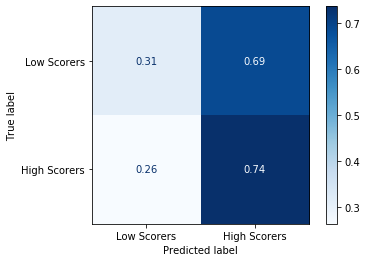

In [128]:
# Train Decesion Tree Classication with Grid Search Parameters
dtree = DecisionTreeClassifier(class_weight='balanced', **dt_grid_search.best_params_)  
dtree.fit(X_train, y_train) 
evaluate_model(X_test, y_test, dt_best_model)

#### Feature Importance & Corr Matrix

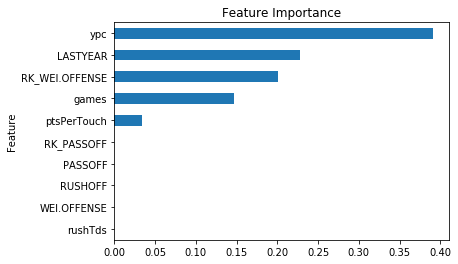

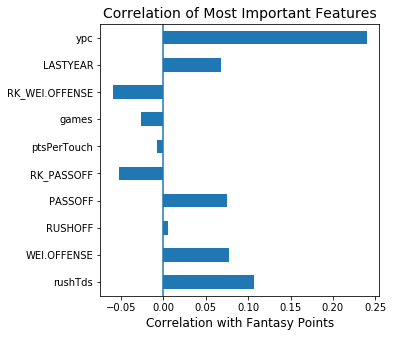

In [129]:
get_corr(df_rb, dtree)

#### Visualize Branches

In [130]:
## visualize the decision tree
def visualize_tree(tree,feature_names=None,class_names=['0','1'],export_graphviz_kws={}):
    """Visualizes a sklearn tree using sklearn.tree.export_graphviz"""
    from sklearn.tree import export_graphviz
    from IPython.display import SVG
    from graphviz import Source
    from IPython.display import display
    if feature_names is None:
        feature_names=X_train.columns

    tree_viz_kws =  dict(out_file=None, rotate=False, filled = True)
    tree_viz_kws.update(export_graphviz_kws)

    # tree.export_graphviz(dt) #if you wish to save the output to a dot file instead
    graph = Source(export_graphviz(tree,feature_names=feature_names,**tree_viz_kws))
    display(SVG(graph.pipe(format='svg')))

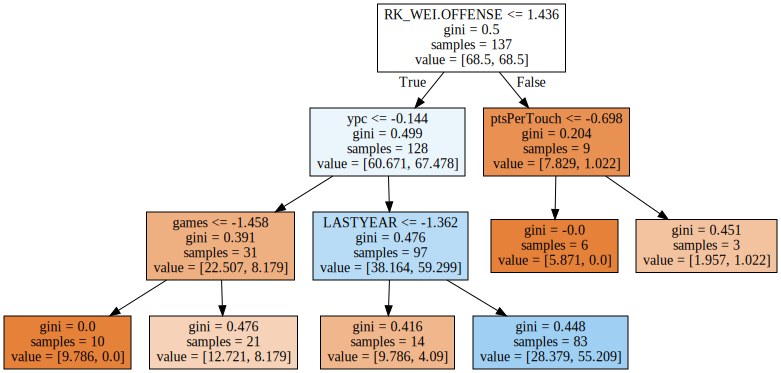

In [131]:
visualize_tree(dtree)

### Random Forest

#### Train & Eval (Default)

Accuracy is :51.43


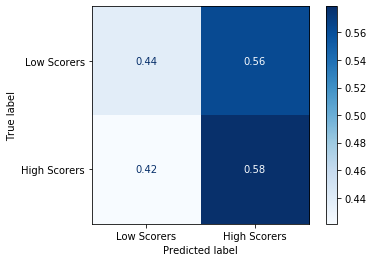

In [132]:
# Train Decesion Tree Classication with default settings
rf = RandomForestClassifier()  
rf.fit(X_train, y_train) 
evaluate_model(X_test, y_test, rf) #function for eval acc score & Confusion Matrix

#### Feature Importance & Matic Corr

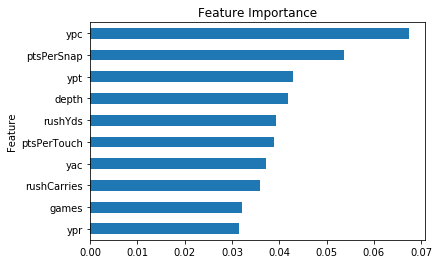

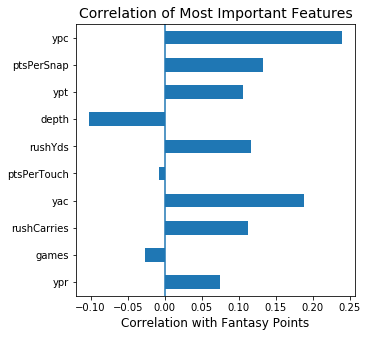

In [133]:
get_corr(df_rb, rf)

#### Grid Search

In [134]:
model = RandomForestClassifier(random_state=42)

In [135]:
# create a dictionary for Combinatoric Grid Searching
rf_param_grid = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [None, 5, 10, 15, 20],
    'min_samples_split': [2,3,4],
    'min_samples_leaf': [1,2,3]
}

# Instantiate GridSearchCV
rf_grid_search = RandomizedSearchCV(model, dt_param_grid, cv=3, n_iter=200, return_train_score=True)

# Fit to the data
rf_grid_search.fit(X_train, y_train)

RandomizedSearchCV(cv=3, error_score=nan,
                   estimator=RandomForestClassifier(bootstrap=True,
                                                    ccp_alpha=0.0,
                                                    class_weight=None,
                                                    criterion='gini',
                                                    max_depth=None,
                                                    max_features='auto',
                                                    max_leaf_nodes=None,
                                                    max_samples=None,
                                                    min_impurity_decrease=0.0,
                                                    min_impurity_split=None,
                                                    min_samples_leaf=1,
                                                    min_samples_split=2,
                                                    min_weight_fraction_leaf=0.0,
               

#### Best Params

In [136]:
rf_grid_search.best_params_

{'min_samples_split': 3,
 'min_samples_leaf': 1,
 'max_features': 15,
 'max_depth': 3,
 'criterion': 'gini'}

#### Best Params Score

In [137]:
rf_grid_search.best_score_

0.606280193236715

#### Train & Eval (Grid Search)

Accuracy is :60.0


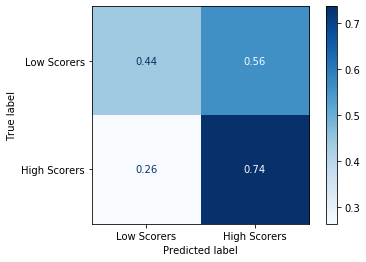

In [138]:
evaluate_model(X_test, y_test, rf_grid_search.best_estimator_)

#### Random Forest Grid Search Summary
Tried multiple hyperparameters options to find the best possible Accuracy score.  It didn’t surpassed the model evaluation threshold level on a consistent basis. It was close but not enough. Not using this model

### XGBoost

In [139]:
from xgboost.sklearn import XGBClassifier  
from xgboost.sklearn import XGBRegressor

#### Train & Eval Model (Default)

Accuracy is :51.43


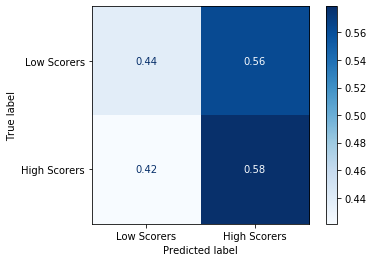

In [140]:
# Train XGBoost Classication
xgb = XGBClassifier()  
xgb.fit(X_train, y_train) 
evaluate_model(X_test, y_test, xgb)

#### Feature Importance & Matic Corr

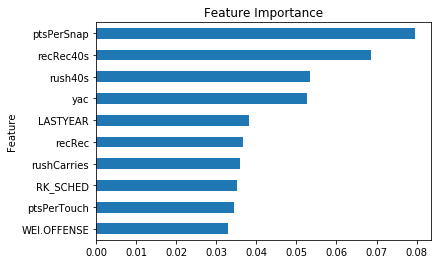

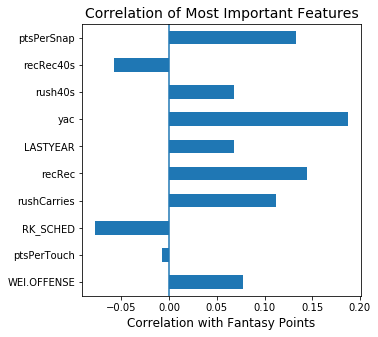

In [141]:
get_corr(df_rb, xgb)

#### Summary:  XGBoost RB
Did not use this model due to low model Accuracy scores.

#### Grid Seach

In [142]:
model = XGBClassifier(randon_state=10)

In [143]:
# create a dictionary for Combinatoric Grid Searching
xgb_param_grid = {
    "learning_rate"    : [0.01, 0.05, 0.10],
     "max_depth"        : [ 3, 4, 5, 6,],
     "min_child_weight" : [ 1, 3, 5, 7 ],
     "gamma"            : [ 0.0, 0.1, 0.2 , 0.3, 0.4 ],
     "colsample_bytree" : [ 0.3, 0.5 , 0.7, 0.1, 1.0 ] 
}

# Instantiate GridSearchCV
#xgb_grid_search = GridSearchCV(model, dt_param_grid, cv=3, return_train_score=True)

xgb_grid_search = RandomizedSearchCV(model, xgb_param_grid, n_iter=200, cv=3, 
                                    return_train_score=True)

# Fit to the data
xgb_grid_search.fit(X_train, y_train)

RandomizedSearchCV(cv=3, error_score=nan,
                   estimator=XGBClassifier(base_score=0.5, booster='gbtree',
                                           colsample_bylevel=1,
                                           colsample_bynode=1,
                                           colsample_bytree=1, gamma=0,
                                           learning_rate=0.1, max_delta_step=0,
                                           max_depth=3, min_child_weight=1,
                                           missing=None, n_estimators=100,
                                           n_jobs=1, nthread=None,
                                           objective='binary:logistic',
                                           random_state=0, randon_state=10,
                                           reg_alpha=0...
                                           silent=None, subsample=1,
                                           verbosity=1),
                   iid='deprecated', n_iter=200, n_j

#### Best Params

In [144]:
xgb_grid_search.best_params_

{'min_child_weight': 1,
 'max_depth': 4,
 'learning_rate': 0.05,
 'gamma': 0.1,
 'colsample_bytree': 0.1}

#### Best Params Score

In [145]:
xgb_grid_search.best_score_

0.5772946859903382

#### Train & Eval Model (Grid Search)

Accuracy is :57.14


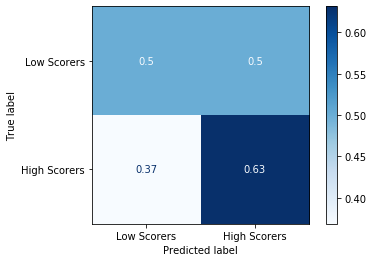

In [146]:
# Train XGBoost Classication with Grid Search Parameters
xgb = XGBClassifier(class_weight='balanced', **xgb_grid_search.best_params_)  
xgb.fit(X_train, y_train) 
evaluate_model(X_test, y_test, xgb_grid_search.best_estimator_) 

### Summary Running Back Models 
I will be using decision tree model for my final recommendation.  The other two models did not exceed the model accuracy evaluation threshold score.  The best model accuracy score for decision tree was 69.6%.  

These are the features to recommend:

* Points per snap
* Lat Year's offense performance
* Weighted offense performance
* Total Yards for season
* Weighed offense performance ((the offense performance is adjusted so that earlier games in the season become gradually less important)
* Effectiveness of rush offense 
* Total rushing yards

What surprised me is that just about all these stats and metrics are really not considered advanced metric stats.  Might be able to save some money and not pay for those data services.

## WR Models

#### X and y. Train Test Split

In [147]:
#making sure X values are correct
drop_cols_wr

['player',
 'position',
 'score bins',
 'rushCarries',
 'rush40s',
 'rushYds',
 'rushYds100Games',
 'rushTds',
 'rushTd40s',
 'rushTa',
 'LASTYEAR',
 'rac']

In [148]:
# create var for train test split as well as bins balance
X_train, X_test, y_train, y_test = my_train_test_split(df_wr, drop_cols_wr)

1    0.5
0    0.5
Name: score bins, dtype: float64

### Decesion Tree

#### Train & Eval Model (Default)

Accuracy is :47.92


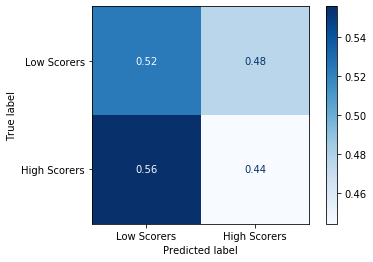

In [149]:
# Train Decesion Tree Classication with default settings
dtree = DecisionTreeClassifier()  
dtree.fit(X_train, y_train) 
evaluate_model(X_test, y_test, dtree) #function for eval acc score & Confusion Matrix

#### Features Importance & Corr Matrix

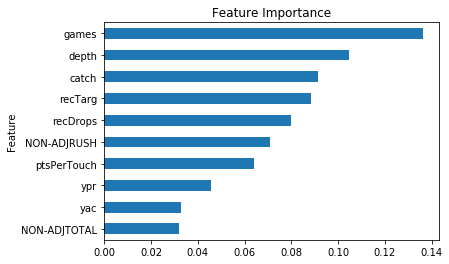

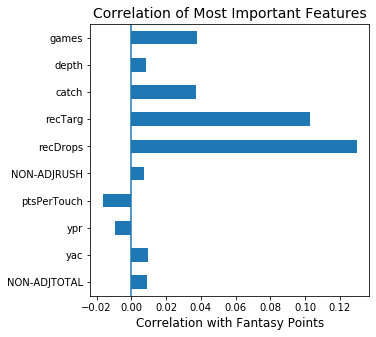

In [150]:
get_corr(df_wr, dtree)

#### Grid Search

In [151]:
model = DecisionTreeClassifier(random_state=10)

In [152]:
# create a dictionary for Combinatoric Grid Searching
dt_param_grid = {
    'criterion': ['gini', 'entropy'],
    'max_features': [None, 3,7, 10, 15, 25],
    'max_depth': [None, 2, 3, 4, 5, 6],
    'min_samples_split': [2,3,4, 5, 10],
    'min_samples_leaf': [1, 2, 3, 4, 5, 6]
}

# Instantiate GridSearchCV
#dt_grid_search = GridSearchCV(model, dt_param_grid, cv=3, return_train_score=True)

dt_grid_search = RandomizedSearchCV(model, dt_param_grid, n_iter=500, cv=3, 
                                    return_train_score=True)

# Fit to the data
dt_grid_search.fit(X_train, y_train)

RandomizedSearchCV(cv=3, error_score=nan,
                   estimator=DecisionTreeClassifier(ccp_alpha=0.0,
                                                    class_weight=None,
                                                    criterion='gini',
                                                    max_depth=None,
                                                    max_features=None,
                                                    max_leaf_nodes=None,
                                                    min_impurity_decrease=0.0,
                                                    min_impurity_split=None,
                                                    min_samples_leaf=1,
                                                    min_samples_split=2,
                                                    min_weight_fraction_leaf=0.0,
                                                    presort='deprecated',
                                                    random_state=10,
            

#### Grid Search Best Params & Score

In [153]:
dt_grid_search.best_params_

{'min_samples_split': 3,
 'min_samples_leaf': 3,
 'max_features': 10,
 'max_depth': None,
 'criterion': 'gini'}

In [154]:
dt_grid_search.best_score_

0.5958354668032088

#### Sort Features (Grid Search)

In [155]:
dt_best_model = dt_grid_search.best_estimator_
sort = pd.Series(dt_best_model.feature_importances_,
                 index=X_train.columns).sort_values(ascending=False)

sort

ypt               0.109909
catch             0.107693
recRec            0.073089
recYds100Games    0.069422
RK_SCHED          0.065144
                    ...   
team_CIN          0.000000
team_CHI          0.000000
team_BUF          0.000000
team_BLT          0.000000
games             0.000000
Length: 62, dtype: float64

#### Train & Eval Model (Grid Search)

Accuracy is :47.92


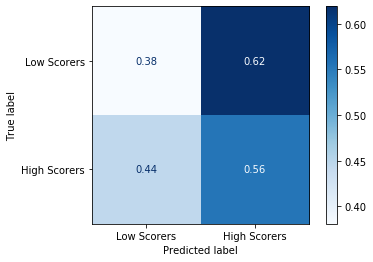

In [156]:
# Train Decesion Tree Classication with Grid Search Parameters
dtree = DecisionTreeClassifier(class_weight='balanced', **dt_grid_search.best_params_)  
dtree.fit(X_train, y_train) 
evaluate_model(X_test, y_test, dt_best_model)

### Random Forest

#### Train & Eval Model (Default)

Accuracy is :47.92


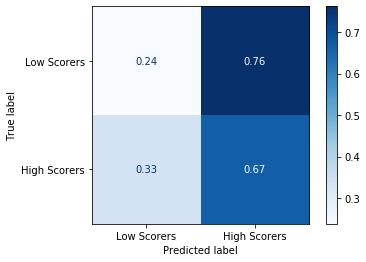

In [157]:
# Train Random Forest Classication with default settings
rf = RandomForestClassifier()  
rf.fit(X_train, y_train) 
evaluate_model(X_test, y_test, rf)

#### Feature Importance & Corr

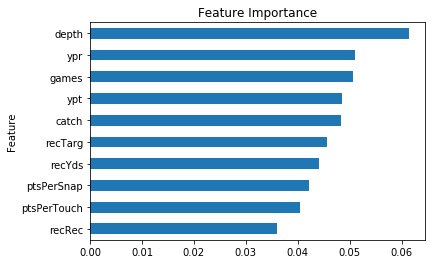

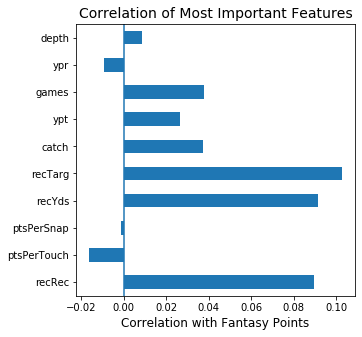

In [158]:
get_corr(df_wr, rf)

#### Grid Search

In [159]:
model = RandomForestClassifier(random_state=10)

In [160]:
# create a dictionary for Combinatoric Grid Searching
rf_param_grid = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [None, 2, 3, 4, 5, 6],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 3, 4, 5, 6]
}

# Instantiate GridSearchCV
rf_grid_search = RandomizedSearchCV(model, dt_param_grid, cv=3, n_iter=200, return_train_score=True)

# Fit to the data
rf_grid_search.fit(X_train, y_train)

RandomizedSearchCV(cv=3, error_score=nan,
                   estimator=RandomForestClassifier(bootstrap=True,
                                                    ccp_alpha=0.0,
                                                    class_weight=None,
                                                    criterion='gini',
                                                    max_depth=None,
                                                    max_features='auto',
                                                    max_leaf_nodes=None,
                                                    max_samples=None,
                                                    min_impurity_decrease=0.0,
                                                    min_impurity_split=None,
                                                    min_samples_leaf=1,
                                                    min_samples_split=2,
                                                    min_weight_fraction_leaf=0.0,
               

In [161]:
rf_grid_search.best_params_

{'min_samples_split': 3,
 'min_samples_leaf': 2,
 'max_features': 7,
 'max_depth': 2,
 'criterion': 'entropy'}

In [162]:
rf_grid_search.best_score_

0.5162997098480969

Accuracy is :52.08


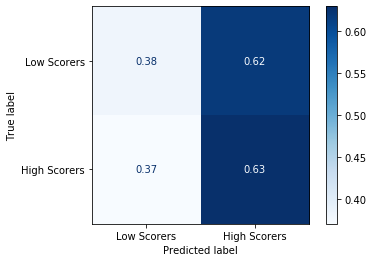

In [163]:
# Train Random Forest Classication with grid search
rf_best = RandomForestClassifier(**rf_grid_search.best_params_)  
rf_best.fit(X_train, y_train) 
evaluate_model(X_test, y_test, rf_best)

#### Features Importance & Corr Matrix

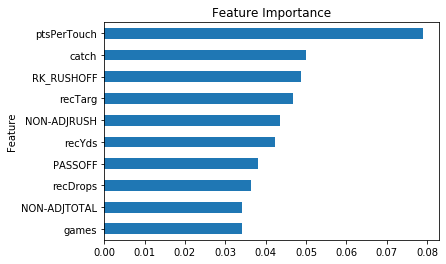

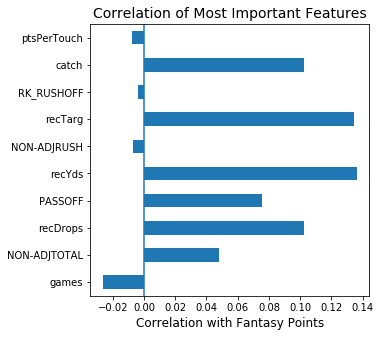

In [164]:
get_corr(df_rb, rf_best)

### XGBoost

#### Train & Eval Model (default)

Accuracy is :50.0


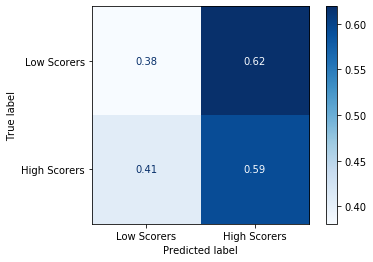

In [165]:
# Train XGBoost Classication
xgb = XGBClassifier()  
xgb.fit(X_train, y_train) 
evaluate_model(X_test, y_test, xgb)

#### Features Importance & Corr Matrix

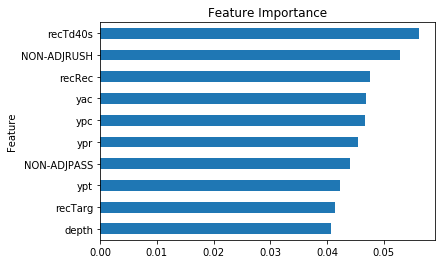

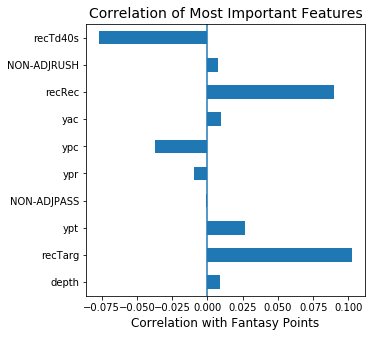

In [166]:
get_corr(df_wr, xgb)

#### Grid Search

In [167]:
model = XGBClassifier(randon_state=10)

In [168]:
# create a dictionary for Combinatoric Grid Searching
xgb_param_grid = {
    "learning_rate"    : [0.05, 0.10, 0.15, 0.20, 0.25, 0.30 ],
     "max_depth"        : [ 3, 4, 5, 6, 8, 10,],
     "min_child_weight" : [ 1, 3, 5, 7 ],
     "gamma"            : [ 0.0, 0.1, 0.2 , 0.3, 0.4 ],
     "colsample_bytree" : [ 0.3, 0.4, 0.5 , 0.7 ] 
}

# Instantiate GridSearchCV
#xgb_grid_search = GridSearchCV(model, dt_param_grid, cv=3, return_train_score=True)

xgb_grid_search = RandomizedSearchCV(model, xgb_param_grid, n_iter=200, cv=3, 
                                    return_train_score=True)

# Fit to the data
xgb_grid_search.fit(X_train, y_train)

RandomizedSearchCV(cv=3, error_score=nan,
                   estimator=XGBClassifier(base_score=0.5, booster='gbtree',
                                           colsample_bylevel=1,
                                           colsample_bynode=1,
                                           colsample_bytree=1, gamma=0,
                                           learning_rate=0.1, max_delta_step=0,
                                           max_depth=3, min_child_weight=1,
                                           missing=None, n_estimators=100,
                                           n_jobs=1, nthread=None,
                                           objective='binary:logistic',
                                           random_state=0, randon_state=10,
                                           reg_alpha=0...
                                           silent=None, subsample=1,
                                           verbosity=1),
                   iid='deprecated', n_iter=200, n_j

#### Best Params & Score

In [169]:
xgb_grid_search.best_params_

{'min_child_weight': 5,
 'max_depth': 10,
 'learning_rate': 0.25,
 'gamma': 0.4,
 'colsample_bytree': 0.4}

In [170]:
xgb_grid_search.best_score_

0.5106673493770267

### Summary Wide Receivers Models 
I will not be using any of these algorithms as part of recommendations because they didn't consistently exceed the model accuracy threshold score.   I did additional feature engineering work to try to improve model eval score as well as "running" many different standard and randomized grid searches but those tasks did not improve model eval scores to acceptable levels.  

Wide receivers were difficult to model because the two positions score points a little differently and some of those wide receivers features are not a part of the dataset.  There were not enough features in the data versus scoring potential with running backs



# INTERPRET 

I did 8 different models types some with many different hyperparameters with my grid search algorithms. The models were done with two separate datasets:  one for running backs and another for wide receivers.  This was done to improve model accuracy by training models with the most relevant features. I easily did over 100 models iterations. All these activities were done to find the best player statistical attributes to score the most fantasy football points.  

The classification Decision Tree model for running backs has the best model accuracy score. The highest score was 69.9%.  Overall, I would estimate the model accuracy score was on average 66%. 

The other models for both running backs and wide receivers did not consistently exceed the 60% threshold for model accuracy; therefore, they were barely exceeding chance.  Therefore, I will only be interpreting results for the Decision Tree model for running backs.  

RECOMMENDATIONS

The statistics or the features listed below are the ones that have the highest potential to score more fantasy points for running backs:

* Points per snap
* Last Year's offense performance
* Weighted offense performance
* Total yards for season
* Weighed offense performance ((the offense performance is adjusted so that earlier games in the season become gradually less important)
* Effectiveness of rush offense 
* Total rushing yards

These are sorted by depending importance with most relevant/high correlation to fantasy points scored

Some observations about these results that surprised me from many years of playing fantasy football:

* An advanced metric like DVOA is not all that relevant for running backs.  (DVOA calculates how successful each team offense is compared to the league average). 

* Points per touch had a slightly negative correlation compared to points per snap.  Points per snap correlates well to number of attempts which in a long standing metric for selecting top performing running backs in fantasy football.  

* A stat like rush attempts over 40 yards is not relevant at all from this model.  My guess is that over the course of a year of fantasy points its far more effective to have a running back that produces high average yards per game versus maybe the explosive runner who will “rack-up" more big runs.  

Overall, the recommendations for selecting running backs for fantasy football should be decided by widely available free stats and not advance stats/metrics.  

 